## Постановка задачи

Заболеваемость и смертность от сердечно-сосудистых заболеваний (ССЗ) продолжает расти во всем мире на протяжении последних нескольких десятилетий. Машинное обучение дает возможность повысить точность прогнозирования рисков сердечно-сосудистых заболеваний.

В этом проекте вам предстоит изучить статью о применении моделей машинного обучения для предсказания ССЗ, а также обучить собственную модель.

#### Выбранный датасет содержит 600 000 записей в обучающем наборе и 400 000 в тестовом. Каждая запись содержит id пациента и 13 признаков:

- Age (возраст);
- Sex (пол);
- Resting_blood_pressure (артериальное давление в состоянии покоя);
- Serum_cholestoral (уровень холестерина в крови mg/dl);
- Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));
- Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);
- Exercise_induced_angina (стенокардия при нагрузке),
- Oldpeak (депрессия ST-сегмента);
- Slope (наклон пикового сегмента ST при физической нагрузке);
- Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);
- Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);
- Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);
- Chest_bin (боль в груди от 1 до 4).

Ссылка на данные (https://www.kaggle.com/competitions/tech-weekend-data-science-hackathon/data);
Ссылка на статью (https://www.sciencedirect.com/science/article/pii/S2772442522000016).

#### Цель проекта
- Изучите и напишите краткое содержание научной статьи.
- Проанализируйте данные.
- Проведите корреляционный анализ.
- Обучите следующие модели и сравните результаты:
    --Logistic Regression;
    --Randomforest;
    --Neural Network.


#### Требования к реализации проекта
- Проект должен быть реализован на языке Python 3 и содержать инструкцию по настройке окружения.
- Реализация проекта должна быть загружена на GitHub. Добавьте графики обучения и результаты анализа данных в README-файл или в Jupyter Notebook.
- Загрузите лучшие веса выбранной модели и подготовьте скрипт для инференса.
- Оформите краткое содержание статьи в отдельный README-файл и также загрузите его в репозиторий.

____


## 1. Импортирование библиотек и загрузка данных

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
from scipy.stats import randint
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

### Загрузка данных (тренировочкая выборка 'train.csv')

In [108]:
train = pd.read_csv('train.csv')
train.head()

ID        age  sex     chest  resting_blood_pressure  serum_cholestoral  \
0   0  49.207124    0  4.000000              162.996167         181.108682   
1   1  53.628425    1  1.741596              130.233730         276.474630   
2   2  49.591426    1  4.000000              146.999012         223.300517   
3   3  58.991445    1  4.000000              112.369143         187.245501   
4   4  51.053602    1  1.954609              138.032047         238.482868   

   fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0                                     0   
1                    0                                     2   
2                    1                                     2   
3                    0                                     0   
4                    0                                     0   

   maximum_heart_rate_achieved  exercise_induced_angina   oldpeak  slope  \
0                   148.227858                        1  0.944547      2   
1                   152.917139                        0  0.119070      2   
2                   102.352090                        1  1.616747      2   
3                   158.164750                        1  0.000000      1   
4                   172.540828                        0  1.150464      1   

   number_of_major_vessels  thal  class  
0                        0     3      1  
1                        0     3      0  
2                        2     7      1  
3                        1     7      1  
4                        1     3      0

___
## 2. Первичное знакомство с данными

In [109]:
train.shape

(600000, 15)

In [110]:
#  Выведем названия колонок
train.columns

Index(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

### Расшифровка признаков

In [ ]:
# 1
train['age'].value_counts()
# числовой признак

In [ ]:
# 2
train['sex'].value_counts()
# бинарный признак
# данные в признаке распределены неравномерно

In [ ]:
# 3
train['chest'].value_counts()
# числовой признак (?)

In [ ]:
# 4
train['resting_blood_pressure'].value_counts()
# числовой признак

In [ ]:
# 5
train['serum_cholestoral'].value_counts()
# числовой признак

In [ ]:
# 6
train['fasting_blood_sugar'].value_counts()
# бинарный признак
# данные распределены неравномерно

In [ ]:
# 7
train['resting_electrocardiographic_results'].value_counts()
# категориальный признак

In [ ]:
# 8
train['maximum_heart_rate_achieved']
# числовой признак

In [ ]:
# 9
train['exercise_induced_angina'].value_counts()
# бинарный признак
# данные распределены неравномерно

In [ ]:
# 10
train['oldpeak'].value_counts()
# числовой признак

In [ ]:
# 11
train['slope'].value_counts()
# категориальный признак

In [ ]:
# 12
train['number_of_major_vessels'].value_counts()
# числовой признак

In [ ]:
# 13
train['thal'].value_counts()
# категориальный признак

In [ ]:
# таргетная переменная
train['class'].value_counts()
# бинарные данные

Таким образом, можно выделить следующие признаки:

- Числовые - 6: 'age','resting_blood_pressure','serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak',  'number_of_major_vessels'

- Бинарные- 3: 'sex','fasting_blood_sugar','exercise_induced_angina'

- Категориальные -3: 'resting_electrocardiographic_results','slope','thal'

             'chest' -  должен быть категориальным, но данные представлены числовыми значениями (разберем ниже в разделе "расшифровка и интерпретация признаков")


Таргентый признак - бинарный, т.о. предстоит решить задачу бинарной классификации.      
      

### Расшифровка и интерпретация признаков

К сожалению, в описании к датасету нет подробной расшифровки значений признаков, попробуем интерпретировать их, исходя из общепринятых в DS значений или похожих данных из подобных датасетов для решения задач, связанных с ССЗ. (Учитывая учебный характер задачи, подобные действия с данным считаю приемлемыми, в случае реальных задач нужно запрашивать у авторов датасетов предоставлять максимально подробную информацию об изучаемых признаках.)

- 'age': (возраст пацента);

- 'sex': (пол пациента), в описании к датасету нет явных указаний, скорее всего, 1 - это мужской пол, 0 - женский (общепринятые в DS обозначения);

- 'chest': боль в груди (известно, что в данной колонке может встретиться 4 типа "боли в груди" от 1 до 4, т.о. это должен быть категориальный признак), в описании к датасету нет явных указаний, в подобных датасетах данный признак трактуется как ( например (0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic), т.о. мы могли бы принять следующую интерпретацию: 1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic). С другой стороны, первичный анализ признака выше показывает, что данный признак не категориальный, а числовой, возможно, боль оценивалась по некоторой шкале. Изучим данный признак более подробно ниже;

- 'resting blood pressure': (артериальное давление в состоянии покоя (мм рт.ст.));

- 'serum_cholestoral': (уровень сывороточного холестерина в крови (mg/dl));

- 'fasting_blood_sugar': (анализ глюкозы в крови натощак (> 120 mg/dl)), встречаются 2 значения: 0 или 1. В описании нет явных указаний на расшифровку значений, по аналогии с другими датасетами будем считать: 1 - True (наличие повышенного уровня глюкозы натощак), 0 -False (нормальный уровень глюкозы натощак);

- 'resting_electrocardiographic_results': (результаты электрокардиографических исследований в покое 0, 1, 2), учитывая отсуствие расшифровки данных воспользуемся значениями из подобного кардиологического датасета: 0=normal (норма), 1=ST-T wave abnormality (аномалия сегмента ST и\или зубца Т), 2=left ventricular hypertrophy (гипертрофия левого желудочка);

- 'maximum_heart_rate_achieved':(максимальная частота сердечных сокращений) (как измеряли? в покое или при нагрузке, какое количество измерений и при каких условиях проводили, это, к сожалению, остается неизвестным);

- 'exercise_induced_angina': (стенокардия при нагрузке), данные представлены двумя значениями(0 и 1), в связи с отсутствием объяснений, можем считать по аналогии с другими датасетами и общей логикой значений бинарных признаков: 1 - True (наличие стенокардии при нагрузки (стенокардии напряжения), 0 - False - отсуствие стенокардии при нагрузке, т.е. норма)

- 'oldpeak' (депрессия ST-сегмента при нагрузке по сравнению с покоем), более подробные разъяснения не приводятся, обычно данные изменения измеряются в мм;

- 'slope': (наклон пикового сегмента ST при физической нагрузке), данные представлены тремя значениями (1,2,3), в аналогичных датасетах (Up: upsloping, Flat: flat, Down: downsloping) или  (Value 1: upsloping, Value 2: flat
        Value 3: downsloping), т.е. можем считать 1 - восходящий, 2 - плоский (без изменений), 3 - нисходящий;

- 'number_of_major_vessels':  (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии)найдено такое описание данного признака в другом кардиологическом датасете: colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots);

- 'thal': результаты таллиевого(сердечного) стресс-теста (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);

Категориальные признаки ('resting_electrocardiographic_results','slope','thal') похожи на номинальные, возможно, в дальнейшем нам придется их перекодировать для использования в моделях.

```

Целевая переменная:
```
- 'class': (0 отсутствие ССЗ, 1 - наличие ССЗ ).

___
## 3. Обработка и очистка данных

### Обработка данных

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

Сразу обращает на себя внимание следующее:
- колонка age - возраст, выраженный дробным числом, судя по отображению первых десяти строк train.head() встречаются данные с точностью до 6 знаков после запятой (например, в первой строке - 49.207124), не совсем понятно, зачем нужна такая точность, а также как такая точность была получена. Т.к. у нас нет возможности спросить у "заказчика\автора" датасета, оставим данные как есть.

- колонка chest - известно, что в данной колонке может встретиться 4 типа "боли в груди" от 1 до 4, т.о. это должен быть категориальный признак, или хотя бы тип int, также не совсем понятно, почему данные в колонке имеют тип float. Видимо, в дальнейшем, нам приедтся перекодировать данные для дальнейшего использования.

- resting_blood_pressure - колонка вызывает такие же вопросы, как и колонка age: тип данных float с точностью до 6 знаков после запятой, что противоречит логике измерения артериального давления (АД), сложно найти прибор для измерения давления, обладающий такой точностью.

- serum_cholestoral- (опечатка в названии колонки, видимо, имеется ввиду cholesterol - холестерин.) Те же вопросы, что и к колонке resting_blood_pressure

- maximum_heart_rate_achieved - вопрос аналогичен предыдущему: почему тип float, и как (и для чего) получена такая детализация до 6 знаков после запятой при измерении частоты серднечных сокращений (ЧСС).
- Oldpeak - депрессия сегмента ST, скорее всего, измеряется в мм, снова возникает вопрос, как получена точность до 6 знака и после запятой.

Возможно, речь идет уже о предобработанных (стандартизированных данных) или возможно было произведено несколько измерений с вычислением АД, уровня холестерина, ЧСС, а в дальнейшем эти данные были усреднены и занесены в соостветсующие колонки датасета, поэтому и фигурирует тип данных float. С колонкой возраст могли поступить так: были известны дата рождения и дата обследования пациента, математически был вычислен возраст путем "вычитания одной даты из другой и последующих математических преобразований".


In [126]:
# поиск пропущенных значений
train.isna().sum()
# пропусков нет

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [127]:
# поиск дубликатов
train.duplicated().sum()
# дубликатов нет

0

### Более подробное знакомство с данными: категориальные признаки

In [128]:
# включим в данный список и бинарные признаки
categoric_cols = ['sex','fasting_blood_sugar','exercise_induced_angina','resting_electrocardiographic_results','slope','thal']

Список категориальных признаков: ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'resting_electrocardiographic_results', 'slope', 'thal']


Распределение признака sex : 
sex
0    193532
1    406468
Name: count, dtype: int64


Распределение признака fasting_blood_sugar : 
fasting_blood_sugar
0    509546
1     90454
Name: count, dtype: int64


Распределение признака exercise_induced_angina : 
exercise_induced_angina
0    399899
1    200101
Name: count, dtype: int64


Распределение признака resting_electrocardiographic_results : 
resting_electrocardiographic_results
0    290609
1      6693
2    302698
Name: count, dtype: int64


Распределение признака slope : 
slope
1    289149
2    264082
3     46769
Name: count, dtype: int64


Распределение признака thal : 
thal
3    334624
6     34677
7    230699
Name: count, dtype: int64




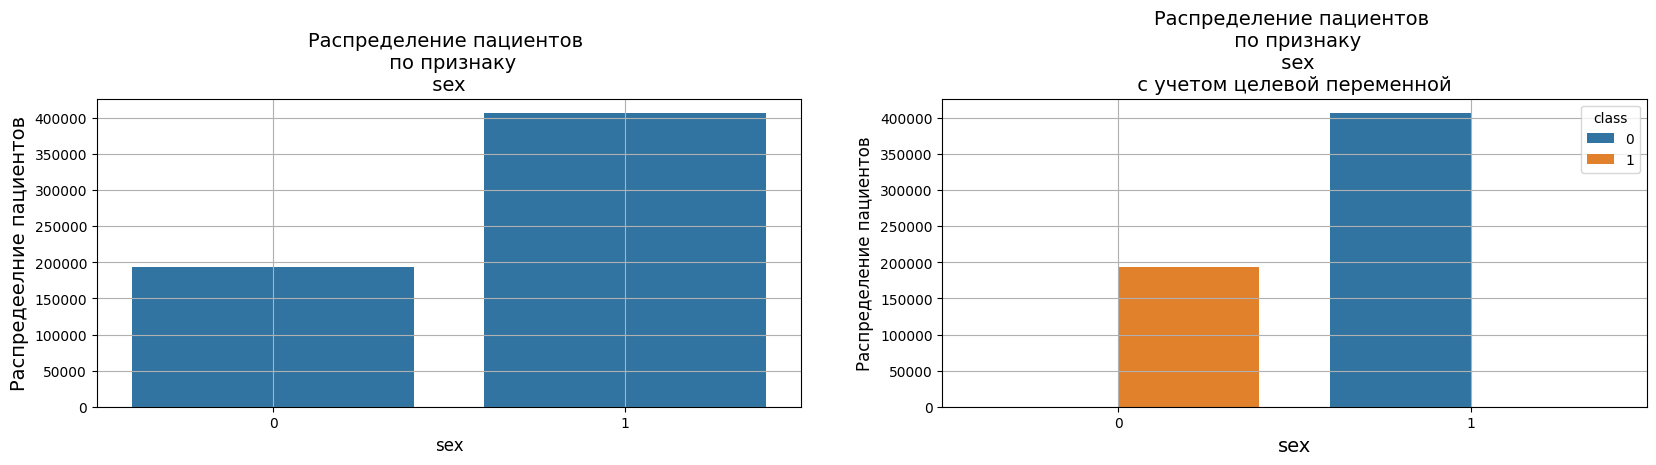

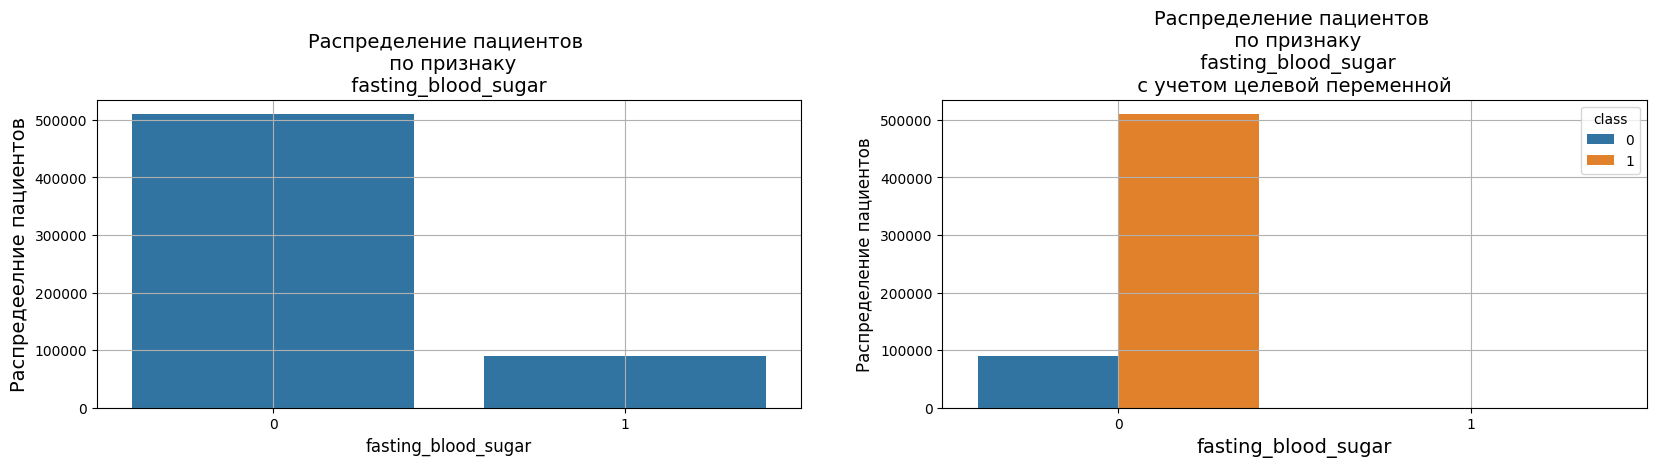

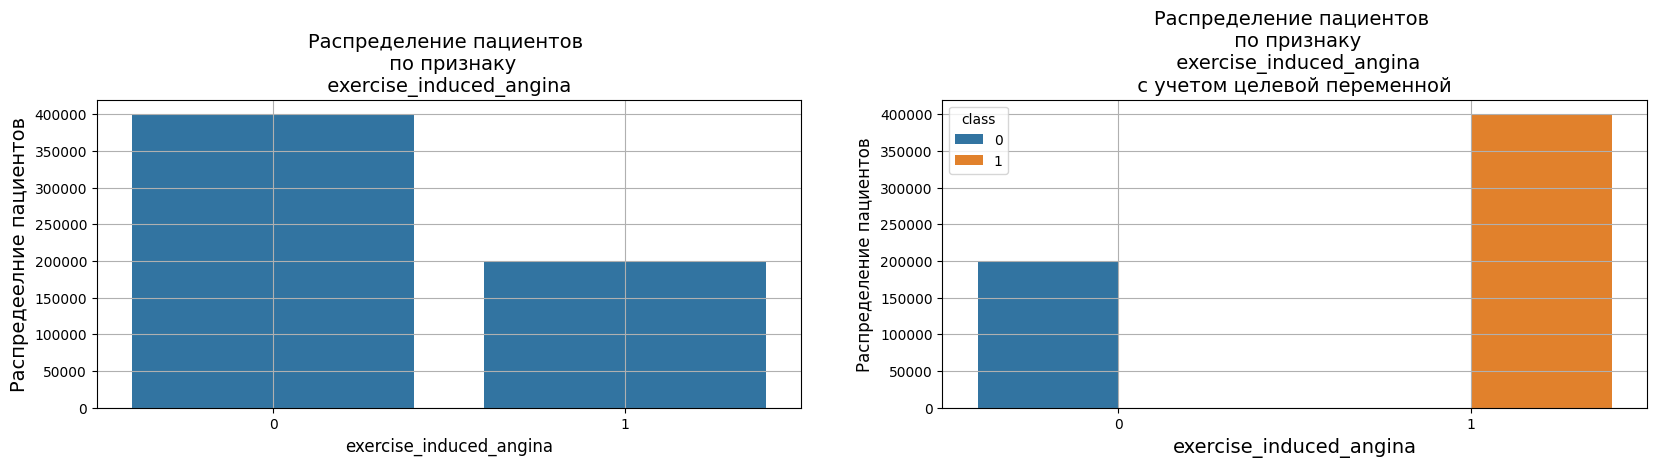

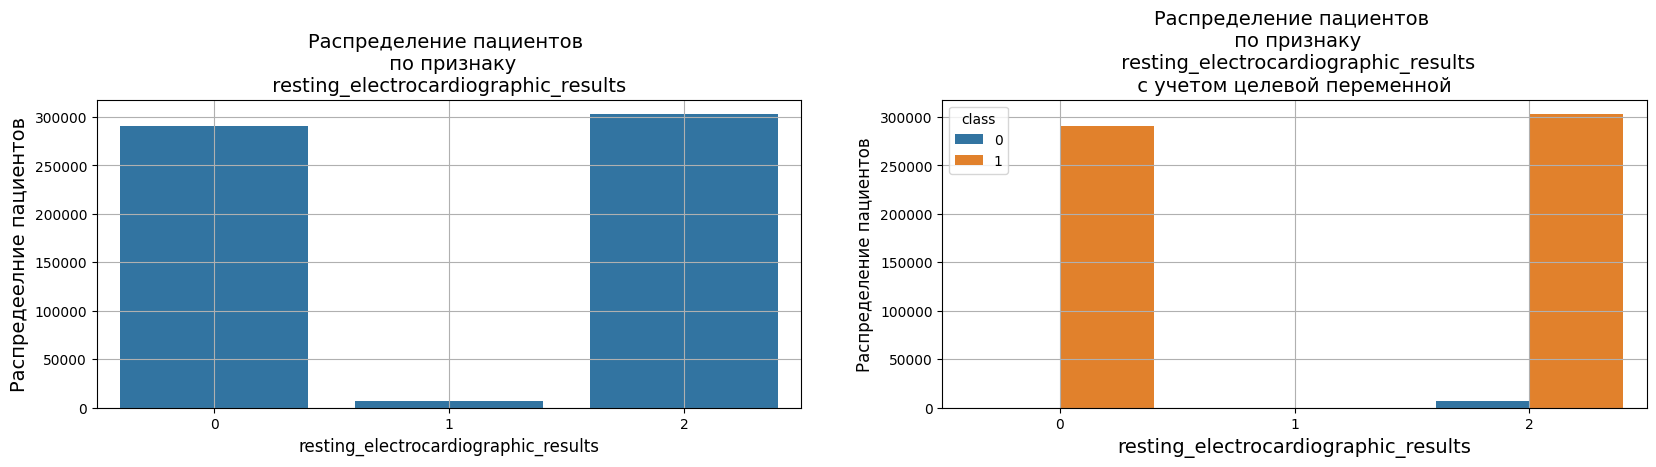

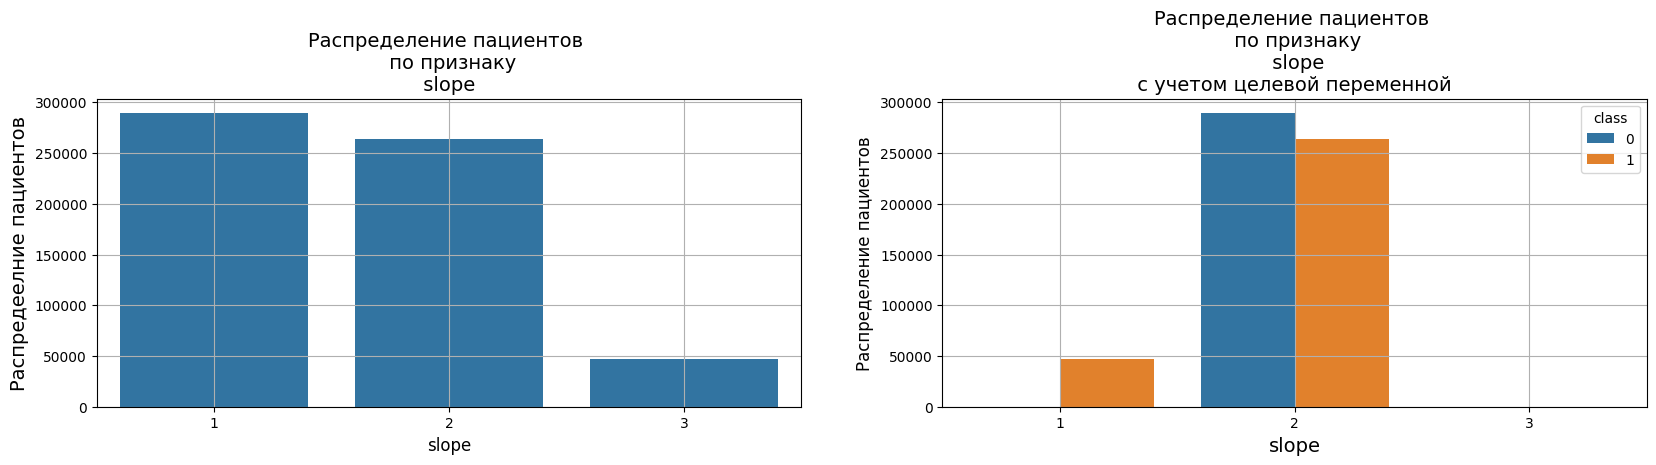

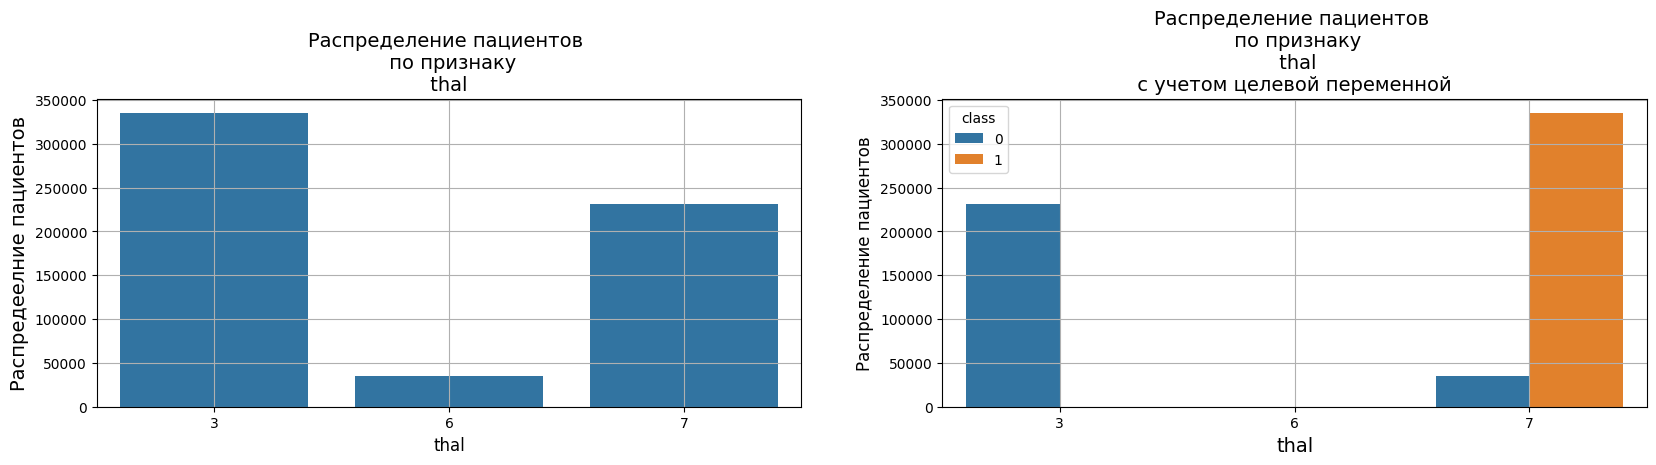

In [129]:
# # выведем уникальные значения и построим графики распределения категориальной переменной,

# Выведем список категориальных признаков
print('Список категориальных признаков:', categoric_cols)

print('\n')

for i in categoric_cols:
    print('Распределение признака {0} : \n{1}'.format(i, train[i].value_counts().sort_index()))
    fig,axes = plt.subplots(1,2,figsize = (20,4))
    barplot = sns.barplot(
        train[i].value_counts(),
        orient = 'v',
        ax = axes[0])
        # axes[0].tick_params(axis='x');
    axes[0].set_title(f'Распределение пациентов \n по признаку\n {i} ', fontsize=14)
    axes[0].set_xlabel(f'{i}', fontsize=12)
    axes[0].set_ylabel('Распредеелние пациентов', fontsize=14)
    axes[0].grid()

    barplot1 = sns.barplot(
        train,
        x = i,
        y = train[i].value_counts(),
        hue = train['class'],
        orient = 'v',
        ax = axes[1])
        # axes[0].tick_params(axis='x');
    axes[1].set_title(f'Распределение пациентов \n по признаку\n {i}\n с учетом целевой переменной ', fontsize=14)
    axes[1].set_xlabel(f'{i}', fontsize=14)
    axes[1].set_ylabel('Распределение пациентов', fontsize=12)
    axes[1].grid()
    print('\n')

Можно заметить, что все категориальные признаки распределены неравномерно.
Целевая переменная также внутри классов распределена неравномерно.

### Более подробное знакомство: числовые признаки

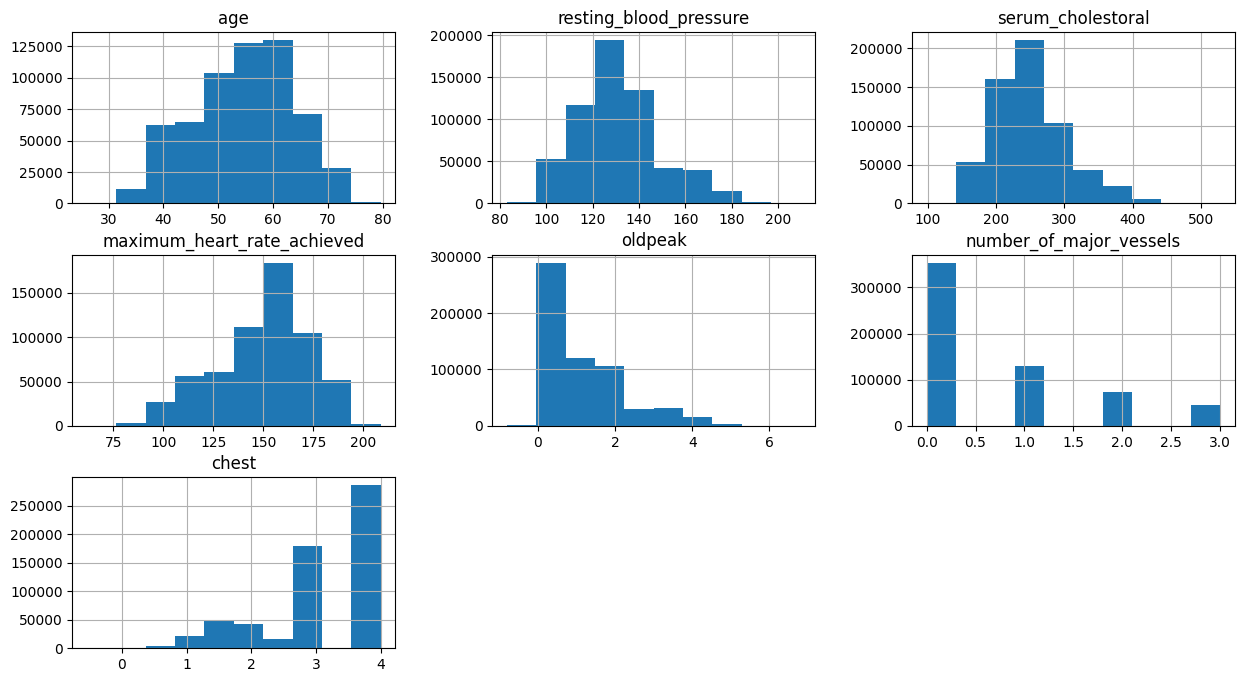

In [130]:
# построим гистрограммы для оценки распределения числовых признаков
col_num = ['age','resting_blood_pressure','serum_cholestoral', 'maximum_heart_rate_achieved',
           'oldpeak',  'number_of_major_vessels', 'chest']

train[col_num].hist(figsize = (15,8));


Признаки 'age', 'resting_blood_pressure', 'serum_cholestoral','maximum_heart_rate_achieved' - имеют распределение, близкое к нормальному.

Признак 'oldpeak' имеет распределение, похоже на логнормальное. 

Признак 'number_of_major_vessels' больше похож на дискретный.

Распределение признака 'chest' - имеет частично нормальное (от 0.5 до 2.5) распределение, далее 3.0 и 4.0 дискретное.

In [131]:
# Посмотрим описательную статистику для числовых признаков

train[col_num].describe().transpose()

count        mean        std        min  \
age                          600000.0   54.426085   9.086041  26.061695   
resting_blood_pressure       600000.0  131.340485  17.842450  82.918527   
serum_cholestoral            600000.0  249.592420  51.699976  98.326263   
maximum_heart_rate_achieved  600000.0  149.592069  23.072593  61.844168   
oldpeak                      600000.0    1.051391   1.144288  -0.806788   
number_of_major_vessels      600000.0    0.681303   0.950669   0.000000   
chest                        600000.0    3.170247   0.949618  -0.538498   

                                    25%         50%         75%         max  
age                           48.078493   55.133425   60.663775   79.591647  
resting_blood_pressure       119.924094  129.727941  139.915216  209.673650  
serum_cholestoral            216.475964  244.233699  274.345453  527.755764  
maximum_heart_rate_achieved  135.704237  153.224828  165.165497  208.735196  
oldpeak                        0.000000    0.811101    1.674081    6.803372  
number_of_major_vessels        0.000000    0.000000    1.000000    3.000000  
chest                          3.000000    3.000000    4.000000    4.000000

Обращает на себя внимание следующее:
- 'age'-возраст испытуемых от 26 до 70 лет с медианой\средним около 54 лет.

- 'resting_blood_pressure' - АД в покое от 82 до 209 мм рт. ст., оба крайних показателя напоминают выбросы, т.к. скорее всего, речь идет о систолическом АД, значения которого ниже 90 мм рт. ст. говорят о гипотензии, а значительно выше 180 говорят о "злокачественной гипертензии", возможно, эти значения будут удалены после обработки данных на "выбросы".

- 'serum_cholestoral' - (<200 мг\дл - норма, 200-239 мг\дл - пограничный, выше 240 мг\дл - высокий), можно обратить внимание на максимальное значение 527 - возможно, это выброс.

- 'maximum_heart_rate_achieved'	- норма пульса от 60 до 90 уд\мин, в наших данные в среднем пульс 153, 67% выборки в рамках от 135 до 165 мм рт.ст. , с максимумом до 208. Т.к. мы не знаем, в покое или при нагрузке производили измерения, мы не можем адекварно интерпретировать данный признак, могу сказать только что для ЧСС в состояни покоя данный показатель является ненормально повышенным для основной выборки пациентов. 

- 'oldpeak' - встречаются отрицательные значения, видимо, вместо ожидаемого отклонения вниз, регистрировали отклонение вверх.

- 'number_of_major_vessels' - номинальный признак

- 'chest' - встречаются отрицательные значения, что, вероятнее всего является выбросом, т.к. "отрицательной боли" быть не может.

In [132]:
col_num

['age',
 'resting_blood_pressure',
 'serum_cholestoral',
 'maximum_heart_rate_achieved',
 'oldpeak',
 'number_of_major_vessels',
 'chest']

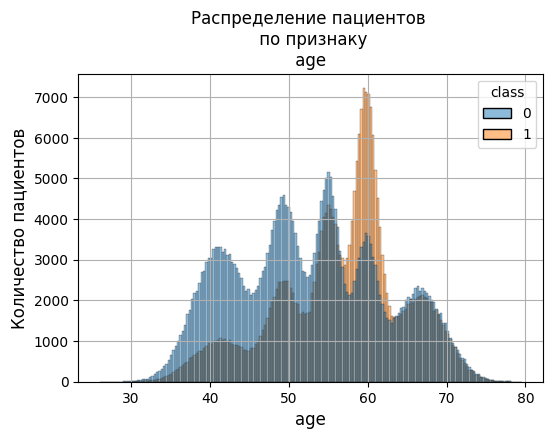

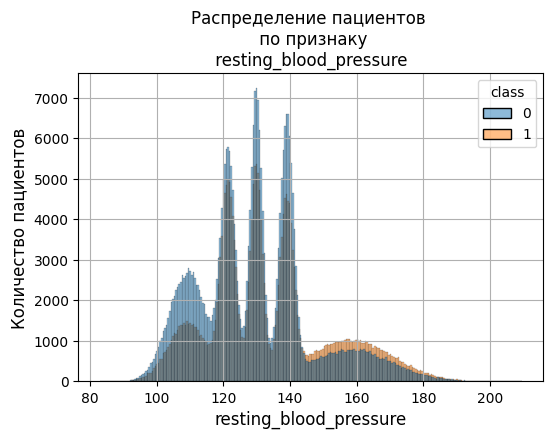

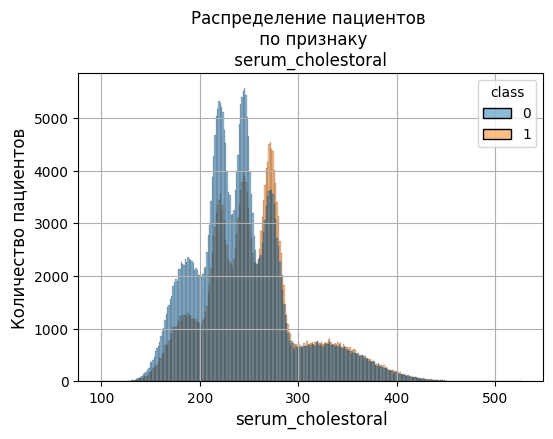

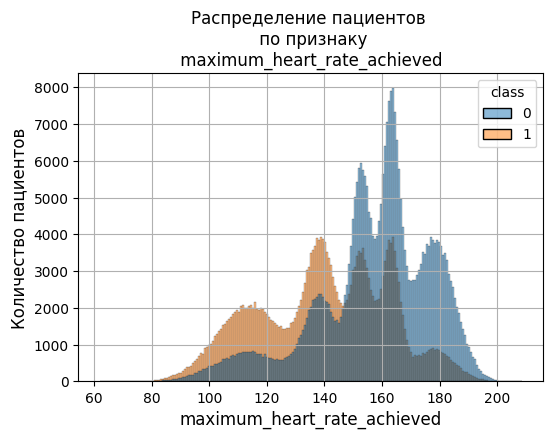

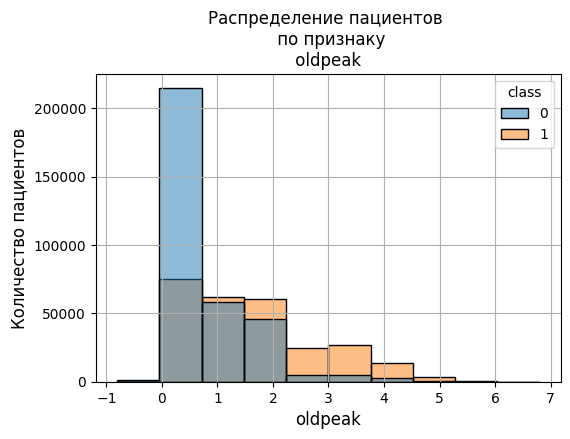

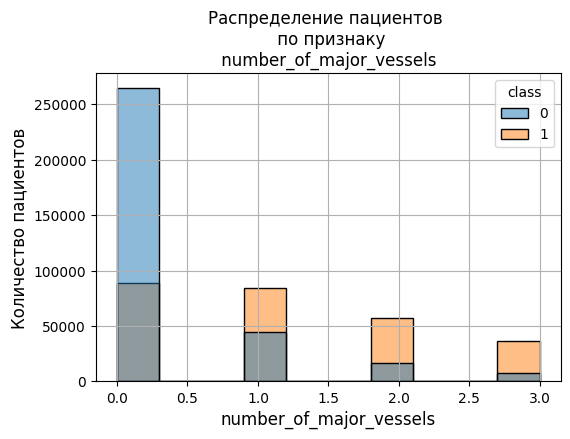

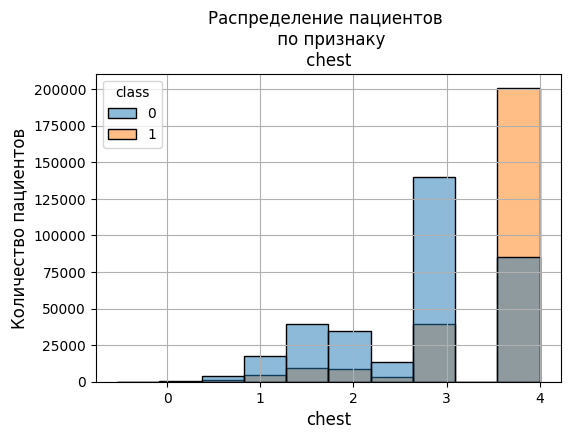

In [133]:
# посмотрим на распределение числовой переменной в пределах каждого из признаков

for a in col_num[:4]:
    fig,axes = plt.subplots(figsize = (6,4))
    hist = sns.histplot(data = train,
                        x =train[a], 
                        hue=train['class'])
    axes.set_title(f'Распределение пациентов \n по признаку\n {a} ', fontsize=12)
    axes.set_xlabel(f'{a}', fontsize=12)
    axes.set_ylabel('Количество пациентов', fontsize=12)
    axes.grid()
    
for a in col_num[4:]:
    fig,axes = plt.subplots(figsize = (6,4))
    hist = sns.histplot(data = train,
                        bins = 10,
                        x =train[a], 
                        hue=train['class'])
    axes.set_title(f'Распределение пациентов \n по признаку\n {a} ', fontsize=12)
    axes.set_xlabel(f'{a}', fontsize=12)
    axes.set_ylabel('Количество пациентов', fontsize=12)
    axes.grid()
    

Обращает на себя внимание следующее:
- 'age'-график распределение по возрасту очень сходный с таковым в группах больных и здоровых испытуемых: меньше всего "больных" в возрастной категории от 35 до 45 лет, далее их количество увеличивается и становится максимальным в возрастной группе 57-63. 

- 'resting_blood_pressure' - "кривая распределения данных" одинакова как среди "больных", так и "здоровых"

- 'serum_cholestoral' - кривая распределения данных" одинакова как среди "больных", так и "здоровых", обращает на себя внимание то, что среди так называемых "здоровых" достаточно испытуемых с уровнем холестерина выше 250, что "несколько" противоречит "клинической практике".

- 'maximum_heart_rate_achieved'	- кривая распределения данных" одинакова как среди "больных", так и "здоровых", обращает на себя внимание то, что "здоровые" в среднем имеют более высокий пульс, чем больные, что также противоречит "клинической практике". 

- 'oldpeak' - ожидаемо здоровых больше всего в районе 0, а больных в группах больше 2.

- 'number_of_major_vessels' - "здоровые" по убывающей распределены во всех 4х группах, "больных" больше всего в группе 1, чуть меньше в группе 2 и еще меньше в группе 3.

- 'chest' - значимые различия по группам только в случае chest = 4, в остальных случаях, больше именно здоровых.

___

## 3. Работа с выбросами:
Построим boxplot для числовых переменных, оценим данные в пределах 1.5*IQR

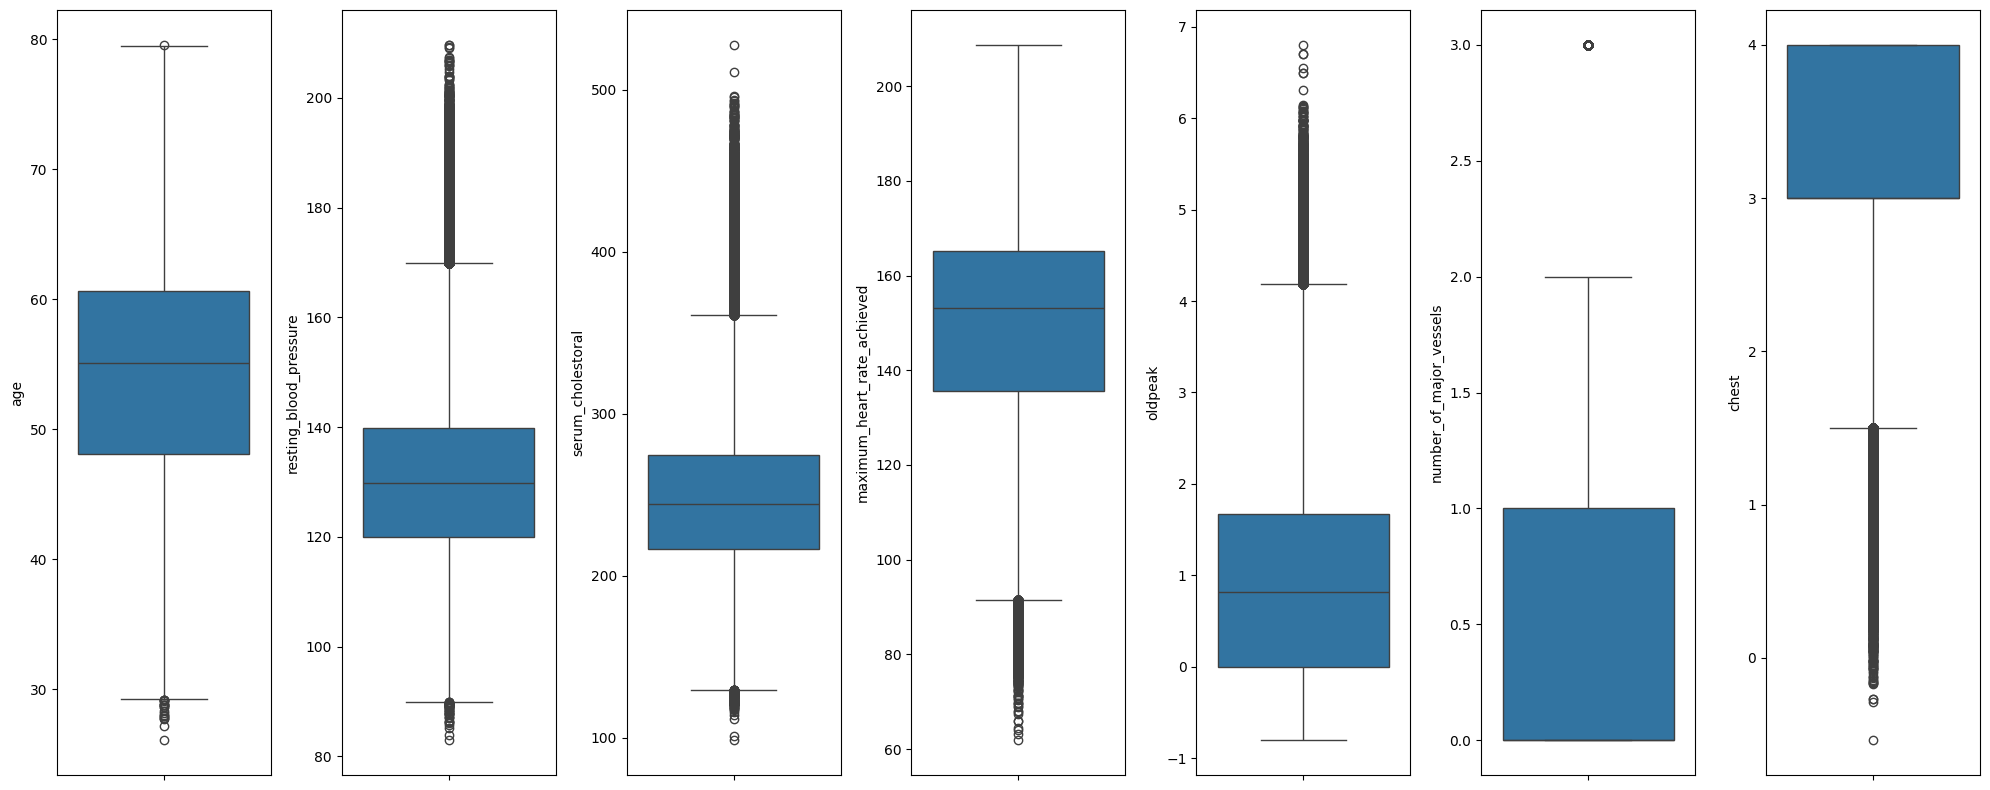

In [134]:
col_num = ['age','resting_blood_pressure','serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak', 
           'number_of_major_vessels', 'chest']
plt.figure(figsize=(20,8))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=train[col_num[i]])
    plt.tight_layout()

In [136]:
# сделаем копию датасета перед удалением выбросов
train_clean = train.copy()

In [138]:
train.shape

(600000, 15)

In [137]:
# удалим выбросы

# колонки 'number_of_major_vessels', 'chest' "чистить" не будем, т.к. их значения больше похожи на категориальные
col_num_for_clean = ['age','resting_blood_pressure','serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak']

for i in col_num_for_clean:
    Q1 = train_clean[i].quantile(0.25)
    Q3 = train_clean[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    train_clean = train_clean[(train_clean[i] >= LowerBound)&(train_clean[i] <= UpperBound)]

In [139]:
# оценим размер тренинговой выборки после удаления признаков
train_clean.shape

(543189, 15)

In [140]:
print("Количество удаленных наблюдений:", train.shape[0]- train_clean.shape[0], ',' , round((train.shape[0]- train_clean.shape[0])/train.shape[0]*100, 4), '%' )

Количество удаленных наблюдений: 56811 , 9.4685 %


In [141]:
# признак chest содержит отрицательные значения. 
# Оценим их количество и удалим, т.к. отрицательных значений боли быть не может.

chest_to_clean = train_clean[train_clean['chest']<0]
chest_to_clean.shape[0]

30

In [142]:
# Удалим 30 наблюдений с chest <0, и проверим правильность удаления
train_clean = train_clean.drop(chest_to_clean.index, axis = 0)
train_clean.shape

(543159, 15)

In [145]:
print("Количество удаленных наблюдений:", train.shape[0]- train_clean.shape[0], ',' , round((train.shape[0]- train_clean.shape[0])/train.shape[0]*100, 4), '%' )

Количество удаленных наблюдений: 56841 , 9.4735 %


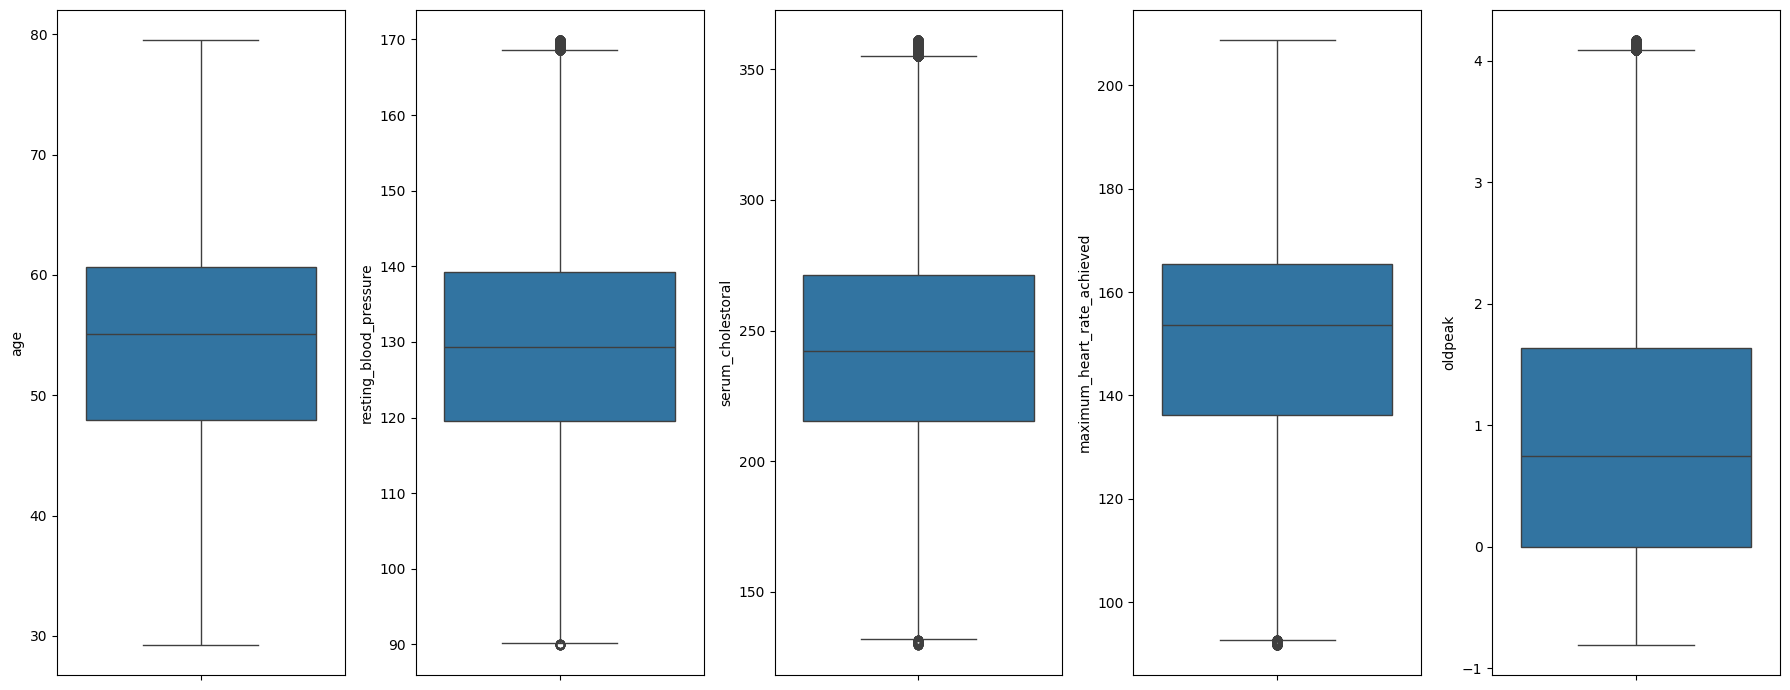

In [146]:
# проверим наши данные после удаления выбросов

plt.figure(figsize=(18,7))
for i in range(0,len(col_num_for_clean)):
    plt.subplot(1,len(col_num_for_clean),i+1)
    sns.boxplot(y = train_clean[col_num_for_clean[i]])
    plt.tight_layout()

___
## 4. Разведывательный анализ (Exploratory Data Analysis (EDA))


In [147]:
# Выведем описательную статистику для числовых переменных после удаления выбросов

train_clean[col_num].describe().transpose()

count        mean        std         min  \
age                          543159.0   54.342649   9.101667   29.250955   
resting_blood_pressure       543159.0  129.650618  15.837852   89.937688   
serum_cholestoral            543159.0  243.760446  44.124226  129.632704   
maximum_heart_rate_achieved  543159.0  150.191275  22.601858   91.742159   
oldpeak                      543159.0    0.984480   1.054048   -0.806788   
number_of_major_vessels      543159.0    0.667339   0.944720    0.000000   
chest                        543159.0    3.157014   0.951403    0.002334   

                                    25%         50%         75%         max  
age                           47.969530   55.050350   60.621011   79.504896  
resting_blood_pressure       119.596248  129.312368  139.213660  169.900393  
serum_cholestoral            215.354970  242.335756  271.195455  361.139578  
maximum_heart_rate_achieved  136.277127  153.558890  165.377012  208.735196  
oldpeak                        0.000000    0.745736    1.633466    4.167373  
number_of_major_vessels        0.000000    0.000000    1.000000    3.000000  
chest                          3.000000    3.000000    4.000000    4.000000

После удаления выбросов значительные изменения коснулись следующих признаков: 

- 'age'-без значительных изменений. 

- 'resting_blood_pressure' - удалены значения выше 169 мм рт. ст. среднее и медиана практически не изменились, что говорит о небольшом количестве выбросов.

- 'serum_cholestoral' - удалены значения выше 361 мг\дл и ниже 129 мг\дл. Среднее и медиана изменились незначительно.

- 'maximum_heart_rate_achieved'	- средняя и максимальная ЧСС не изменилась, система удалила значения ниже 91 уд\мин, что считаю некорректным с клинической точки зрения. Но т.к. мы не знаем точно, что это за показатель (в покое или при нагрузке), оставлю данный признак как есть. Если бы мы точно знали, что эти данные в состоянии покоя, то нужно было бы отменить удаление наблюдений с ЧСС ниже 91. 

- 'oldpeak' - удалены изменения выше 4.16, если бы мы точно знали описание данного признака, то с клинической точки зрения такое удаление выбросов неоправданно. В настоящий момент оставим, как есть.

- 'number_of_major_vessels' - без особых изменений.

- 'chest' - отрицательные значения были удалены.

### Построим гитограммы для оценки распределения числовых признаков


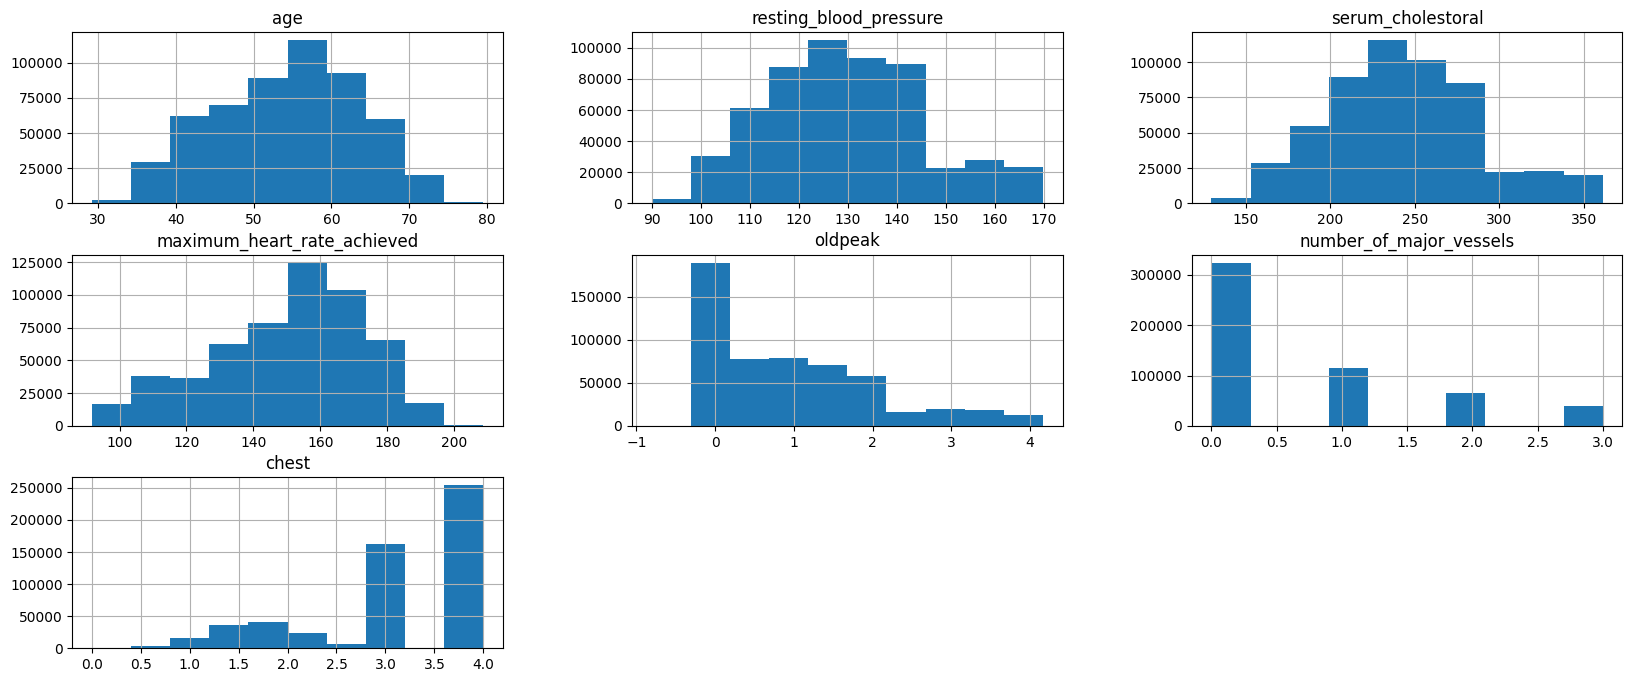

In [148]:
train_clean[col_num].hist(figsize = (20,8));

Признаки 'age', 'serum_cholestoral'- имеют близкое к нормальному распределение.
Признаки 'resting_blood_pressure', 'maximum_heart_rate_achieved' имеют ненормальное распределение.
Признак 'oldpeak' имеет распределение, похоже на логнормальное. Признак 'number_of_major_vessels' больше похож на дискретный.
Распределение признака 'chest' - имеет частично нормальное (от 0.5 до 2.5) распределение, далее 3.0 и 4.0 дискретное.

In [149]:
train_clean.columns

Index(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [150]:
# удалим колонку ID, она нам не нужна для дальнейшей работы.
train_clean = train_clean.drop('ID', axis = 1)
train_clean.shape
# (543159, 14)

(543159, 14)

In [151]:
train_clean.columns

Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [78]:
col_num

['age',
 'resting_blood_pressure',
 'serum_cholestoral',
 'maximum_heart_rate_achieved',
 'oldpeak',
 'number_of_major_vessels',
 'chest']

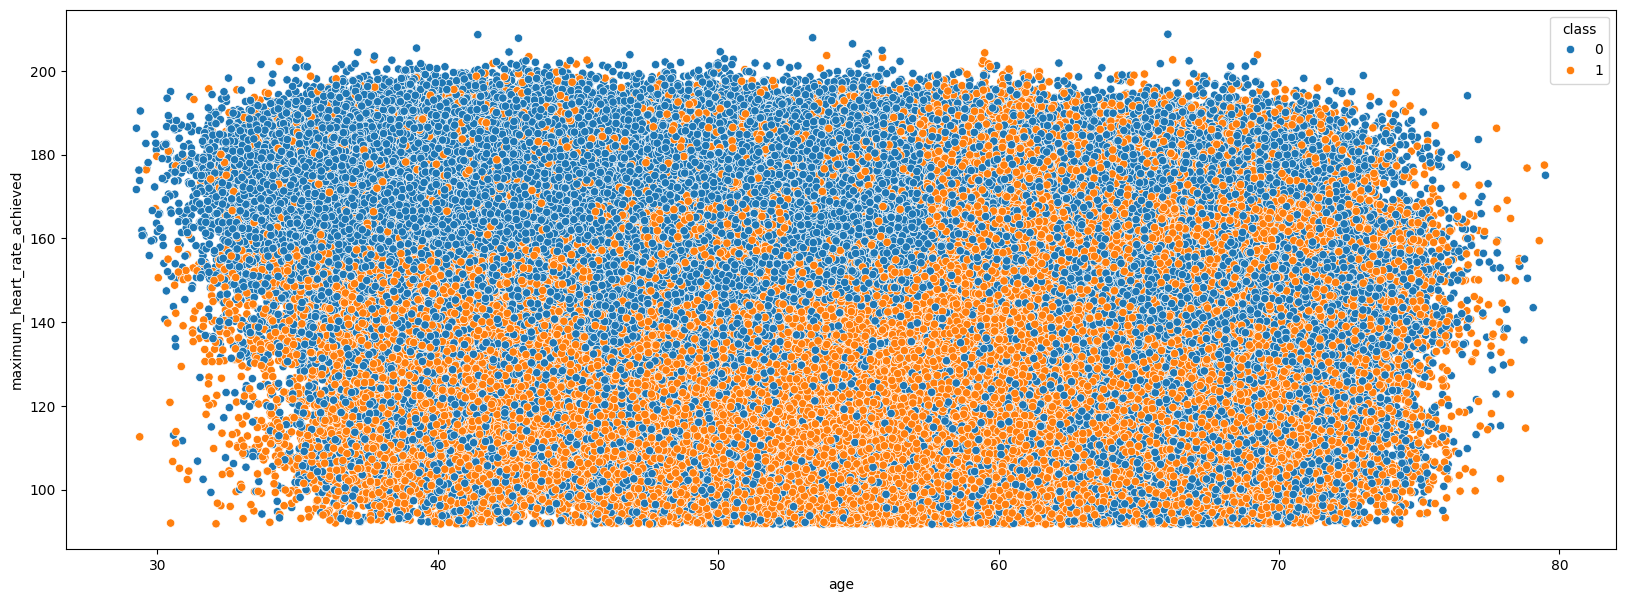

In [152]:
# попробуем визуализировать распределение числовых признаков с учетом таргетной переменной с помощью scatterplot 

plt.subplots(figsize = (20, 7))
sns.scatterplot(x = train_clean['age'], y = train_clean['maximum_heart_rate_achieved'],  hue = train_clean['class']);

Данный график оказался не очень информативным, Условно можно сказать, что максимальный ЧСС до 55 лет от 160 до 200 регистрируется у "здоровых", что несколько противоречит клинической практике.

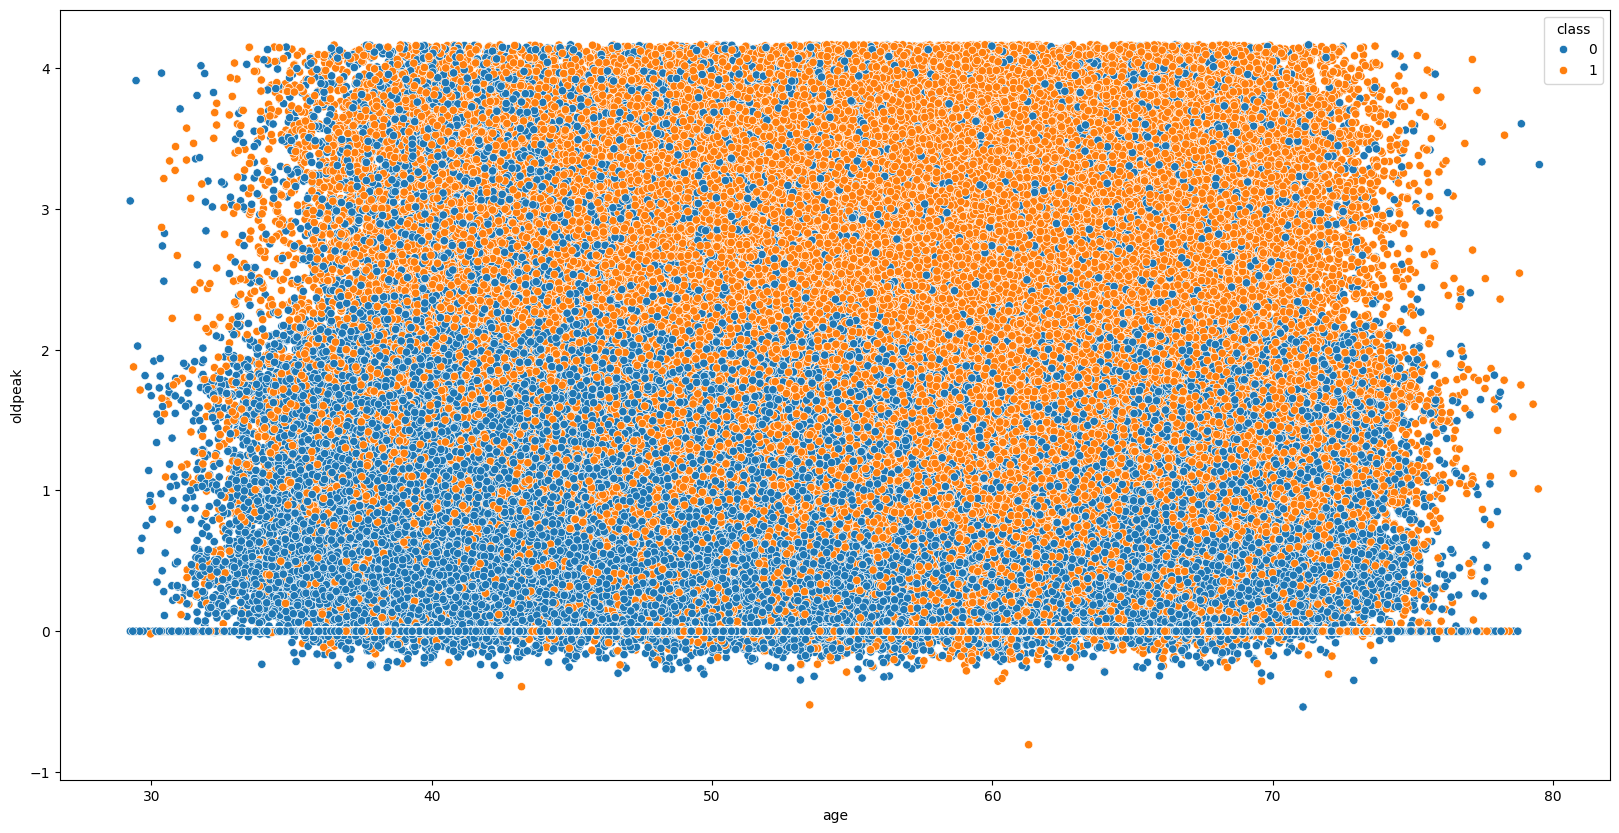

In [153]:
plt.subplots(figsize = (20, 10))
sns.scatterplot(x = train_clean['age'], y = train_clean['oldpeak'],  hue = train_clean['class']);

Данный график тоже не очень информативный. На данном графике можно заметить, что oldpeak в районе 4 чаще встречается у больных в возрасте после 60 лет.

Посмотрим на распределение числового признака с учетом распределения целевой переменной на гистограммах.

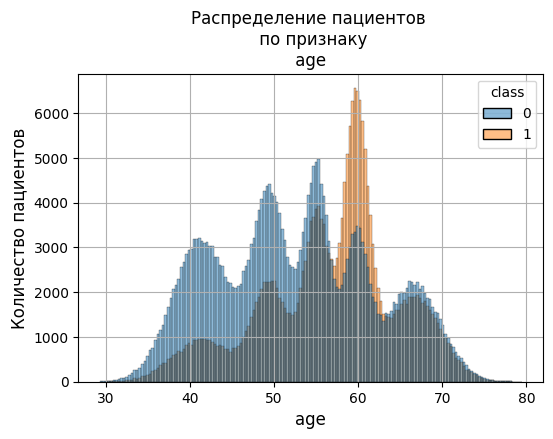

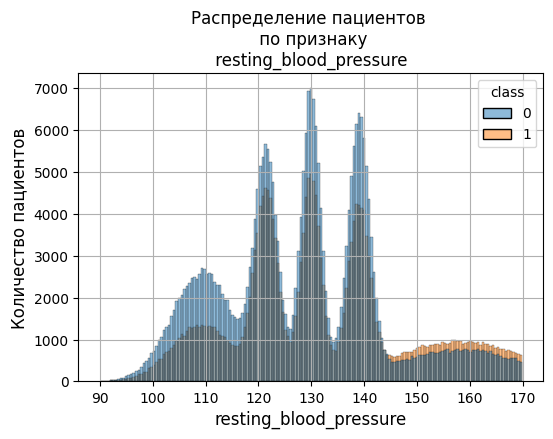

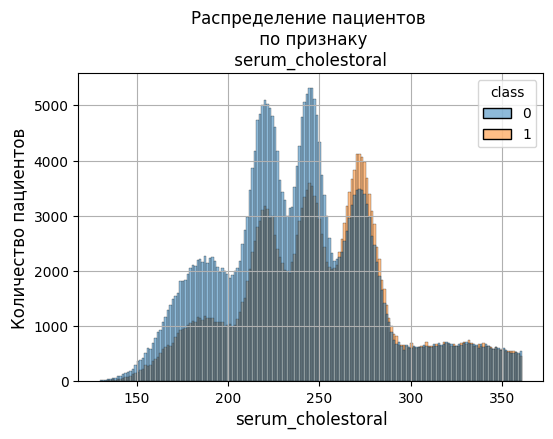

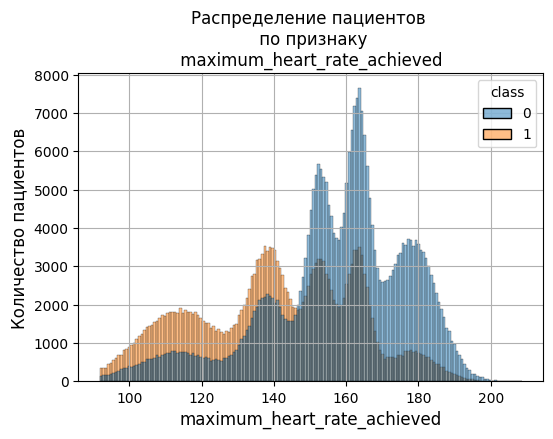

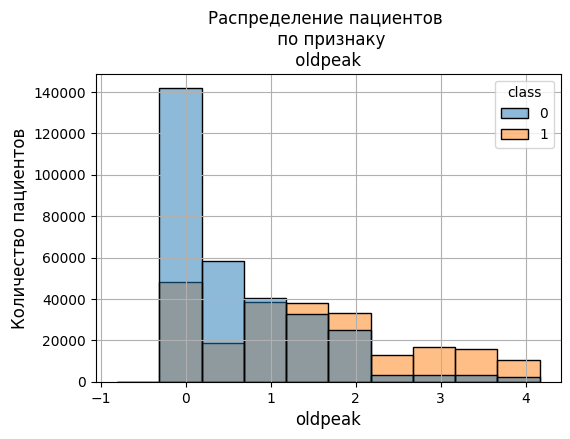

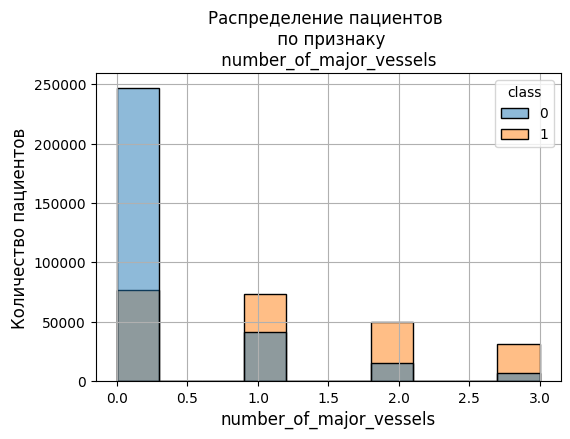

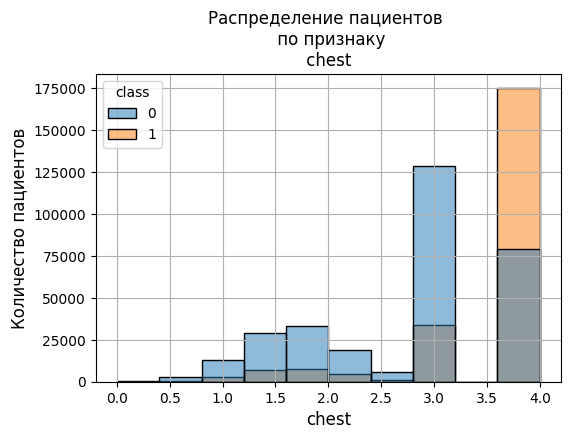

In [154]:
for a in col_num[:4]:
    fig,axes = plt.subplots(figsize = (6,4))
    hist = sns.histplot(data = train_clean,
                        x =train_clean[a], 
                        hue=train_clean['class'])
    axes.set_title(f'Распределение пациентов \n по признаку\n {a} ', fontsize=12)
    axes.set_xlabel(f'{a}', fontsize=12)
    axes.set_ylabel('Количество пациентов', fontsize=12)
    axes.grid()
    
for a in col_num[4:]:
    fig,axes = plt.subplots(figsize = (6,4))
    hist = sns.histplot(data = train_clean,
                        bins = 10,
                        x =train_clean[a], 
                        hue=train_clean['class'])
    axes.set_title(f'Распределение пациентов \n по признаку\n {a} ', fontsize=12)
    axes.set_xlabel(f'{a}', fontsize=12)
    axes.set_ylabel('Количество пациентов', fontsize=12)
    axes.grid()

- 'age'-график распределение по возрасту очень сходный с таковым в группах больных и здоровых испытуемых: меньше всего "больных" в возрастной категории от 35 до 45 лет, далее их количество увеличивается и становится максимальным в возрастной группе 57-63. 

- 'resting_blood_pressure' - "кривая распределения данных" признака одинакова как среди "больных", так и "здоровых",  после удаления выбросов значительных изменений в распределении признака не обнаружено.

- 'serum_cholestoral' - кривая распределения данных" подинакова как среди "больных", после удаления выбросов значительных изменений в распределении признака не обнаружено.

- 'maximum_heart_rate_achieved'	- кривая распределения данных" одинакова как среди "больных", так и "здоровых", обращает на себя внимание то, что "здоровые" в среднем имеют более высокий пульс, чем больные, что также противоречит "клинической практике". 

- 'oldpeak' - ожидаемо здоровых больше всего в районе 0, а больных в группах больше 2.

- 'number_of_major_vessels' - "здоровые" по убывающей распределены во всех 4х группах, "больных" больше всего в группе 1, чуть меньше в группе 2 и еще меньше в группе 3.

- 'chest' - значимые различия по группам только в случае chest = 4, группе 3 намного больше здоровых, чем больных.

___

## 5.Проверка на мультиколлинеарность и отбор признаков для использования в моделях

### - 5.1 Проверка с помощью матрицы корреляций

In [155]:
# сделаем копию train_clean перед отбором признаков
train_clean_1 = train_clean.copy()

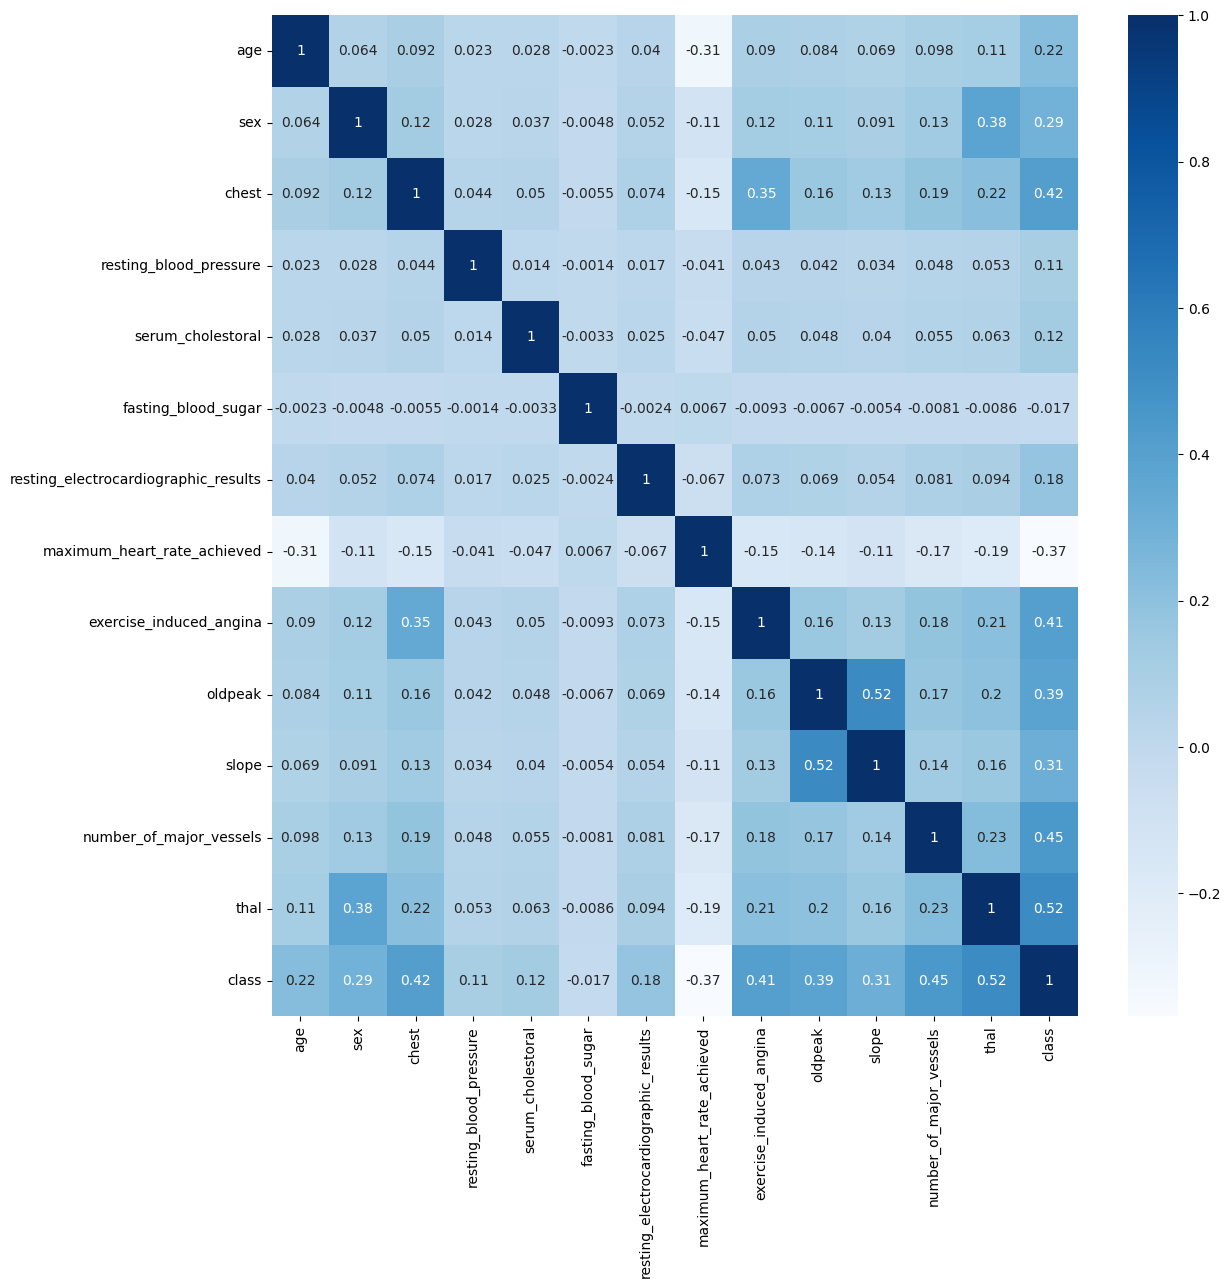

In [161]:
# сначала попробуем оценить корреляцию признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (13,13))
corr = train_clean[['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic_results',
       'maximum_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', 'class']].corr()
sns.heatmap(corr, cmap="Blues", annot=True);

Можно заметить неплохую положительную корреляцияю целевой переменной с признаками 'chest', 'exercise_induced_angina', 'oldpeak',
       'slope', 'number_of_major_vessels', 'thal', а также отрицательную корреляцию с признаком 'maximum_heart_rate_achieved'.

В то же время, можно отметить мультиколлинеальность следующих признаков: 'chest' и 'exercise_induced_angina' (0.35) и 'thal' и 'sex' (0.38), 'slope' и 'oldpeak' (0.52).

### - 5.2 Проверка на мультиколлинеальность с помощью коэффициент инфляции дисперсии и отбор подходящих признаков с помощью коэффициента корреляции Пирсона

In [162]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [163]:
# Скачаем коэффициент инфляции дисперсии (variance_inflation_factor,VIF) для оценки мультиколлинеальности
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
# Создадим таблицу для хранения VIF значений
vif_data = pd.DataFrame()
vif_data['feature'] = train_clean.columns

# Вычислим VIF для каждого признака
vif_data['VIF'] = [variance_inflation_factor(train_clean.values, i) for i in range(len(train_clean.columns))]
pd.set_option('display.max_rows', None)

# Отсортируем по убывающей
vif_data.sort_values(by= 'VIF', ascending = False)
# Установим vif limit = 10

feature        VIF
3                 resting_blood_pressure  49.916468
7            maximum_heart_rate_achieved  35.869955
0                                    age  30.079055
4                      serum_cholestoral  28.095551
2                                  chest  14.562916
10                                 slope  10.117254
12                                  thal  10.008678
13                                 class   4.161097
1                                    sex   3.626170
9                                oldpeak   2.787218
6   resting_electrocardiographic_results   2.102544
11               number_of_major_vessels   1.874660
8                exercise_induced_angina   1.873780
5                    fasting_blood_sugar   1.177160

In [165]:
# Удалим колонку с VIF более, чем установленный лимит (VIF limit = 10)
# Повторим шаги с вычисленыем VIF для оставшихся колонок и удаление тех, что выше лимита

train_clean.drop(columns=['resting_blood_pressure'], inplace=True)

In [166]:
vif_data = pd.DataFrame()
vif_data['feature'] = train_clean.columns
vif_data['VIF'] = [variance_inflation_factor(train_clean.values, i) for i in range(len(train_clean.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)
# vif limit = 10

feature        VIF
6            maximum_heart_rate_achieved  28.460624
3                      serum_cholestoral  26.591053
0                                    age  25.929453
2                                  chest  14.311200
9                                  slope  10.029157
11                                  thal   9.944737
12                                 class   4.160294
1                                    sex   3.624456
8                                oldpeak   2.786349
5   resting_electrocardiographic_results   2.100314
10               number_of_major_vessels   1.874209
7                exercise_induced_angina   1.873492
4                    fasting_blood_sugar   1.176825

In [167]:
train_clean.drop(columns=['maximum_heart_rate_achieved'], inplace=True)

In [168]:
vif_data = pd.DataFrame()
vif_data['feature'] = train_clean.columns
vif_data['VIF'] = [variance_inflation_factor(train_clean.values, i) for i in range(len(train_clean.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)
# vif limit = 10

feature        VIF
0                                    age  23.523630
3                      serum_cholestoral  21.413220
2                                  chest  13.435098
8                                  slope   9.722159
10                                  thal   9.711708
1                                    sex   3.617551
11                                 class   3.495447
7                                oldpeak   2.782624
5   resting_electrocardiographic_results   2.091775
9                number_of_major_vessels   1.872922
6                exercise_induced_angina   1.872496
4                    fasting_blood_sugar   1.175601

In [169]:
train_clean.drop(columns=['age'], inplace=True)

In [170]:
vif_data = pd.DataFrame()
vif_data['feature'] = train_clean.columns
vif_data['VIF'] = [variance_inflation_factor(train_clean.values, i) for i in range(len(train_clean.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)
# vif limit = 10

feature        VIF
2                      serum_cholestoral  14.616569
1                                  chest  12.291736
9                                   thal   9.409028
7                                  slope   9.320745
0                                    sex   3.608557
10                                 class   3.466761
6                                oldpeak   2.777542
4   resting_electrocardiographic_results   2.080412
8                number_of_major_vessels   1.871272
5                exercise_induced_angina   1.871096
3                    fasting_blood_sugar   1.173912

In [171]:
train_clean.drop(columns=['serum_cholestoral'], inplace=True)

In [172]:
vif_data = pd.DataFrame()
vif_data['feature'] = train_clean.columns
vif_data['VIF'] = [variance_inflation_factor(train_clean.values, i) for i in range(len(train_clean.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)
# vif limit = 10

feature       VIF
1                                 chest  8.843798
8                                  thal  8.503286
6                                 slope  8.085655
0                                   sex  3.579455
9                                 class  3.257565
5                               oldpeak  2.762627
3  resting_electrocardiographic_results  2.043809
4               exercise_induced_angina  1.866843
7               number_of_major_vessels  1.866264
2                   fasting_blood_sugar  1.169318

Т.о., после удаления колонок в соотвествии с 'VIF limit<10' у нас остались следующие признаки.

In [173]:
train_clean.columns

Index(['sex', 'chest', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'exercise_induced_angina',
       'oldpeak', 'slope', 'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [175]:
train_clean.shape

(543159, 10)

Для оставшихся признаков с помощью корреляции Пирсона, оценим корреляцию с целевой переменной ('class'), определим среднюю корреляцию и оставим только те признаки, которые выше "средней корреляции".

Корреляция Пирсона, Pearson Correlation,


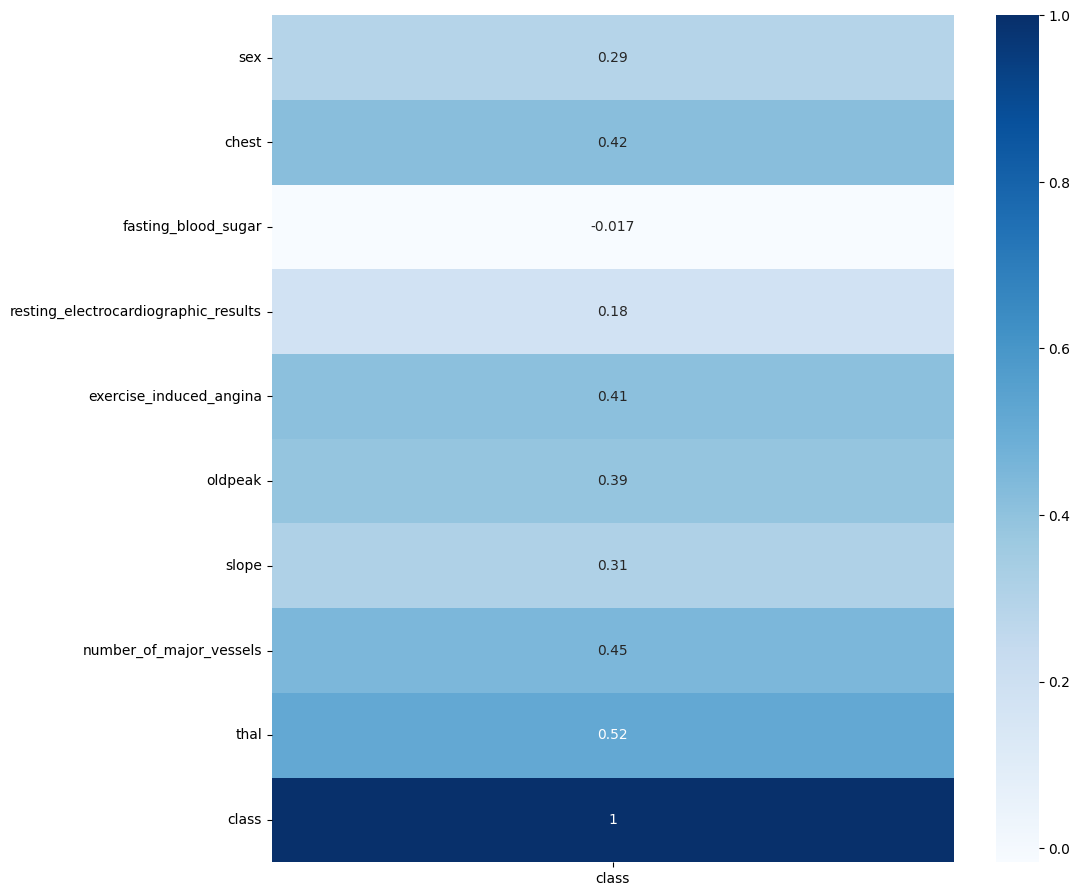

Абсолютные значения коэффициентов корреляции: 
sex                                     0.291134
chest                                   0.416713
fasting_blood_sugar                     0.016864
resting_electrocardiographic_results    0.179486
exercise_induced_angina                 0.411437
oldpeak                                 0.387606
slope                                   0.311215
number_of_major_vessels                 0.448149
thal                                    0.515408
Name: class, dtype: float64


Средний коэффициент корреляции: 0.3308902891061337


Отобранные признаки (с коэффициентом корреляции выше среднего): 
chest                      0.416713
exercise_induced_angina    0.411437
oldpeak                    0.387606
number_of_major_vessels    0.448149
thal                       0.515408
Name: class, dtype: float64


In [176]:
print('Корреляция Пирсона, Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = train_clean.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('Абсолютные значения коэффициентов корреляции: ')
print(abs(cor['class'][0:-1]))

cor['class'] = cor['class'][0:-1]
margin = abs(cor['class'][0:-1]).mean()

print('\n')

print('Средний коэффициент корреляции: {0}'.format(margin))

print('\n')

print('Отобранные признаки (с коэффициентом корреляции выше среднего): ')
fs = abs(cor['class'][0:-1])[abs(cor['class']) > margin]
print(fs)

In [177]:
# оставим только те колонки, которые соотвествуют "отобранным признакам", запишем в новую переменную
train_last = train_clean.drop(columns = ['sex', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'slope'])

In [178]:
# Т.о., мы получили список отобранных признаков с помощью VIF  и Коэффициента корреляции Пирсона
train_last.columns

Index(['chest', 'exercise_induced_angina', 'oldpeak',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [179]:
train_last.head()

chest  exercise_induced_angina   oldpeak  number_of_major_vessels  thal  \
0  4.000000                        1  0.944547                        0     3   
1  1.741596                        0  0.119070                        0     3   
2  4.000000                        1  1.616747                        2     7   
3  4.000000                        1  0.000000                        1     7   
4  1.954609                        0  1.150464                        1     3   

   class  
0      1  
1      0  
2      1  
3      1  
4      0

### - 5.3 Проверим еще один алгоритм отбора "оптимальных параметров" с проверкой на мультиколлинеальность с помощью построения модели DecisionTreeClassifier

In [180]:
# Будем использовать все признаки из данных после удаления выбросов.
train_clean_1.shape

(543159, 14)

In [181]:
# Будем использовать все признаки из данных после удаления выбросов.
# создадим X_1  и y_1 
X_1 = train_clean_1.drop(columns=['class'])
y_1 = train_clean_1['class']

In [187]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report

In [186]:
#Создаём объект класса DecisionTreeClassifier
tree_features = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
tree_features.fit(X_1, y_1)
 
#Делаем предсказание класса
y_pred = tree_features.predict(X_1)

In [188]:
#Выводим отчёт о метриках
print(metrics.classification_report(y_1, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    310539
           1       0.86      0.84      0.85    232620

    accuracy                           0.87    543159
   macro avg       0.87      0.87      0.87    543159
weighted avg       0.87      0.87      0.87    543159



In [190]:
# #Создаём фигуру для визуализации графа
# fig = plt.figure(figsize=(15, 20))
# #Строим граф дерева решений
# tree.plot_tree(
#     tree_features, #объект обученного дерева
#     feature_names=X_1.columns, #наименования факторов
#     class_names=["0 - No heart disease", "1 - heart disease"], #имена классов
#     filled=True, #расцветка графа
# );

In [210]:
# Важность признаков можно посмотреть, с помощью атрибута feature_importances_:

conc = pd.DataFrame(tree_features.feature_importances_, X_1.columns)


print(conc)

                                             0
age                                   0.012414
sex                                   0.001545
chest                                 0.245402
resting_blood_pressure                0.000000
serum_cholestoral                     0.000000
fasting_blood_sugar                   0.000000
resting_electrocardiographic_results  0.000687
maximum_heart_rate_achieved           0.072172
exercise_induced_angina               0.051760
oldpeak                               0.032544
slope                                 0.061000
number_of_major_vessels               0.173538
thal                                  0.348937


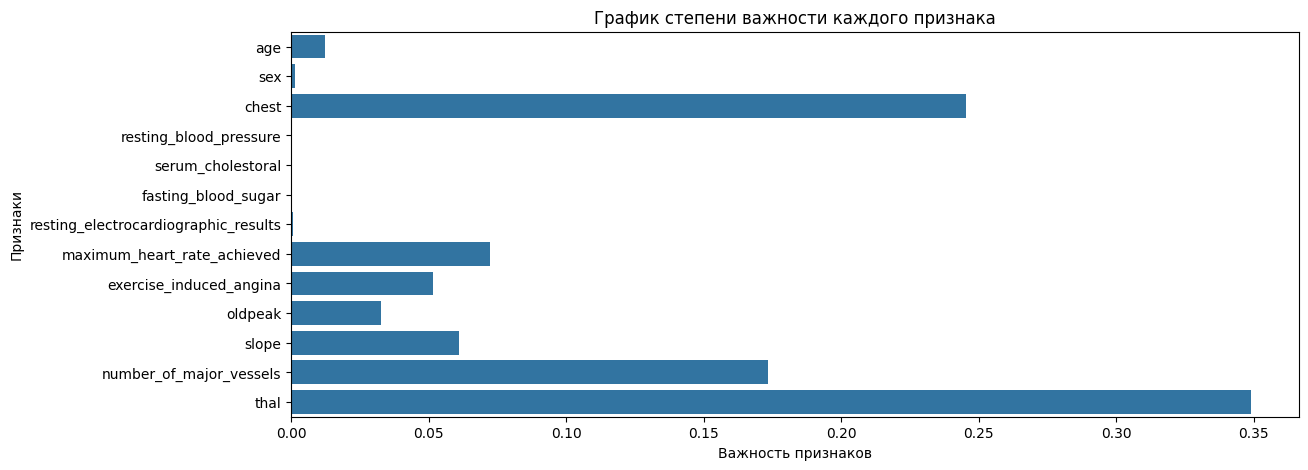

In [211]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X_1.columns #признаки
feature_importances = tree_features.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(y=feature, x=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('График степени важности каждого признака')
ax.set_ylabel('Признаки')
ax.set_xlabel('Важность признаков');

 Если взять порог для значимости признака 0.05, получаем следующие признаки
 
'chest', 'maximum_heart_rate_achieved', 'exercise_induced_angina', 'slope', 'number_of_major_vessels', 'thal'    

Сравним с теми признаками, которые мы оставили после "проверки на мультиколлинеальность"

In [200]:
train_last.columns

Index(['chest', 'exercise_induced_angina', 'oldpeak',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

"Дерево решений" считает, что к списку можно добавить еще признаки "maximum_heart_rate_achieved " и "slope", признак "maximum_heart_rate_achieved " был отброшен по результатам проверки на мультиколлинеальность, признак "slope" "не прошел проверку" по итогам корреляции с целевой переменной.

Т.о. набор признаков на основании дерева решений и отбора по алгоритму, приведенному выше, оказался одинаковым.

Возвращаемся к датасету train_last, который мы получили до этапа проверки признаков с помощью "дерева решений".

___

## 6. Разделение выборки на тренировочную и тестовую.

### - 6.1 Исследуем файла test.csv, чтобы определить, можем ли мы использовать его в качестве тестовой выборки.

In [213]:
test = pd.read_csv('test.csv')
test.shape

(400000, 14)

In [214]:
test.columns

Index(['ID', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal'],
      dtype='object')

Тестовая выборка не содержит целевой переменной 'class', значит, мы не сможем ее использовать для оценки наших моделей.

Поэтому будем использовать датасет train_last: разделем его на тренировочный и тестовый наборы для дальнейшего использования в моделях.

### - 6.2 Отделяем целевую переменную от основного датасета, формируем X, y

In [215]:
X = train_last.drop(columns=['class'])
y = train_last['class']

In [216]:
X.head()

chest  exercise_induced_angina   oldpeak  number_of_major_vessels  thal
0  4.000000                        1  0.944547                        0     3
1  1.741596                        0  0.119070                        0     3
2  4.000000                        1  1.616747                        2     7
3  4.000000                        1  0.000000                        1     7
4  1.954609                        0  1.150464                        1     3

В финальный отбор признаков для участия в обучении моделей попал категориальный номинальный признак 'thal', перекодируем его с помощью get_dummies для использования в моделях.

In [217]:
X_dum= X.copy()

In [218]:
X_dum = pd.get_dummies(
    X_dum,
    columns=['thal'],
    dtype='int')

In [219]:
X_dum.head()

chest  exercise_induced_angina   oldpeak  number_of_major_vessels  \
0  4.000000                        1  0.944547                        0   
1  1.741596                        0  0.119070                        0   
2  4.000000                        1  1.616747                        2   
3  4.000000                        1  0.000000                        1   
4  1.954609                        0  1.150464                        1   

   thal_3  thal_6  thal_7  
0       1       0       0  
1       1       0       0  
2       0       0       1  
3       0       0       1  
4       1       0       0

In [220]:
y.value_counts(True)

class
0    0.571728
1    0.428272
Name: proportion, dtype: float64

Есть небольшой дисбаланс таргетного признака.

### - 6.3 Разделяем данные: Train-Test-Split

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.2, random_state = 42)

In [222]:
X_train.shape

(434527, 7)

In [223]:
y_train.shape

(434527,)

In [224]:
X_train.columns

Index(['chest', 'exercise_induced_angina', 'oldpeak',
       'number_of_major_vessels', 'thal_3', 'thal_6', 'thal_7'],
      dtype='object')

In [225]:
X_train.head()

chest  exercise_induced_angina   oldpeak  number_of_major_vessels  \
585892  4.000000                        1  0.000000                        0   
408366  1.516911                        0  1.849168                        2   
300357  4.000000                        1  1.749761                        2   
364056  3.000000                        0  2.989534                        1   
558063  4.000000                        1  0.000000                        1   

        thal_3  thal_6  thal_7  
585892       1       0       0  
408366       0       1       0  
300357       1       0       0  
364056       0       0       1  
558063       0       0       1

In [226]:
y_train.value_counts(True)

class
0    0.572022
1    0.427978
Name: proportion, dtype: float64

In [227]:
y_test.value_counts(True)

class
0    0.57055
1    0.42945
Name: proportion, dtype: float64

Распределение целевой переменной в тестовой и тренировочной выборках одинаково.

___

## 7. Подбор гиперпараметров моделей

In [228]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [229]:
# Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

Для оптимизации процесса подбора параметров, будем работать с каждой моделью отдельно.

### 7.1 Подбор параметров для логистической регрессии.

In [231]:
# Задаем параметры для Логистической регрессии
model_params_lr = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
    }
}

score_lr = []

In [232]:
# Производим подбор гиперпараметров для логистической регрессии с помощью GridSearch

for model_name, mp in model_params_lr.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    score_lr.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [233]:
score_lr

 # [{'model': 'Logistic_Regression',
#   'best_score': 0.8524188373663906,
#   'best_params': {'multi_class': 'multinomial',
#    'penalty': 'l2',
#    'solver': 'newton-cg'}}]

[{'model': 'Logistic_Regression',
  'best_score': 0.8524188373663906,
  'best_params': {'multi_class': 'multinomial',
   'penalty': 'l2',
   'solver': 'newton-cg'}}]

### - 7.2 Подбор параметров для случайного леса .

In [234]:
# Задаем гиперпараметры для Случайного леса
# сначала возьмем небольшое количество параметров, далее будем изменять, в зависимости от результатов
model_params_rf = {'RandomForest':
        {
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators' : [400, 800],
            'max_depth' : [4,8],
            'min_samples_leaf':[2,4]
            # 'min_samples_split': [4,6,8,10]
            # 'criterion':['log_loss', 'entropy', 'gini', 'none']

            }
    }}

    # model_params_rf = {'RandomForest':
    #     {
    #     'model':RandomForestClassifier(),
    #     'params':{
    #         'n_estimators' : [400, 500,600, 700, 800],
    #         'max_depth' : [4,5,6,7,8],
    #         'min_samples_leaf':[2,3,4,5,6,7],
    #         'min_samples_split': [4,6,8,10]
    #         # 'criterion':['log_loss', 'entropy', 'gini', 'none']

    #         }
    # }}
score_rf = []

In [78]:
#  Подбираем гиперпараметры для случайного леса
for model_name, mp in model_params_rf.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    score_rf.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [79]:
score_rf

# [{'model': 'RandomForest',
#   'best_score': 0.8637368924155558,
#   'best_params': {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 400}}]

[{'model': 'RandomForest',
  'best_score': 0.8637368924155558,
  'best_params': {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 400}}]

### - 7.3 Подбор параметров для готовой нейросети из библиотеки sklearn (MPLClassifier).
#### 7.3.1. Первая итерация

In [235]:
from sklearn.neural_network import MLPClassifier
model_params_mlc = {'MLPClassifier':
        { 'model' : MLPClassifier(),
          'params':{
            'hidden_layer_sizes': [2,4,6],
            # 'max_iter' : [6,10,14],
            'activation': ['relu', 'identity', 'logistic', 'tanh'],
             'solver': ['lbfgs', 'sgd', 'adam'],
            # 'learning_rate': ['constant', 'invscaling', 'adaptive'],
        }
    }
    }

score_mlc = []

In [256]:
#  Подбираем гиперпараметры для нейронной сети
for model_name, mp in model_params_mlc.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    score_mlc.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [257]:
score_mlc

# [{'model': 'MLPClassifier',
#   'best_score': 0.8632467042974733,
#   'best_params': {'activation': 'logistic',
#    'hidden_layer_sizes': 6,
#    'solver': 'lbfgs'}}]

[{'model': 'MLPClassifier',
  'best_score': 0.8632536084675899,
  'best_params': {'activation': 'logistic',
   'hidden_layer_sizes': 6,
   'solver': 'lbfgs'}}]

#### 7.3.2. Вторая итерация

In [134]:
model_params_mlc_1 = {'MLPClassifier':
        { 'model' : MLPClassifier(),
          'params':{
            'hidden_layer_sizes': [6],
             'max_iter' : [6,10,14],
            'activation': ['logistic'],
             'solver': ['lbfgs'],
             'learning_rate': ['constant', 'invscaling', 'adaptive'],
        }
    }
    }

score_mlc_1 = []

In [135]:
for model_name, mp in model_params_mlc_1.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    score_mlc_1.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
        })

In [136]:
score_mlc_1

# [{'model': 'MLPClassifier',
#   'best_score': 0.8524395491776408,
#   'best_params': {'activation': 'logistic',
#    'hidden_layer_sizes': 6,
#    'learning_rate': 'adaptive',
#    'max_iter': 14,
#    'solver': 'lbfgs'}}]

[{'model': 'MLPClassifier',
  'best_score': 0.8524395491776408,
  'best_params': {'activation': 'logistic',
   'hidden_layer_sizes': 6,
   'learning_rate': 'adaptive',
   'max_iter': 14,
   'solver': 'lbfgs'}}]

#### 7.3.3. Третья итерация

In [141]:
model_params_mlc_2 = {'MLPClassifier':
        { 'model' : MLPClassifier(),
          'params':{
            'max_iter' : [20,50,100],
            'hidden_layer_sizes': [8],
            'learning_rate': ['constant', 'invscaling', 'adaptive'],
        }
    }
    }

score_mlc_2 = []

In [142]:
for model_name, mp in model_params_mlc_2.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train)
    score_mlc_2.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
        })

In [164]:
score_mlc_2

[{'model': 'MLPClassifier',
  'best_score': 0.8632467049330188,
  'best_params': {'hidden_layer_sizes': 8,
   'learning_rate': 'constant',
   'max_iter': 100}}]

[{'model': 'MLPClassifier',
  'best_score': 0.8632467049330188,
  'best_params': {'hidden_layer_sizes': 8,
   'learning_rate': 'constant',
   'max_iter': 100}}]

#### В самом конце проекта будет создана и проверена полносвязная нейросеть на Keras

___

## 8. Построение финальных моделей с выбранными параметрами и оценка качества

### 1. Логистическая регрессия

In [237]:
score_lr
# [{'model': 'Logistic_Regression',
#   'best_score': 0.8524188373663906,
#   'best_params': {'multi_class': 'multinomial',
#    'penalty': 'l2',
#    'solver': 'newton-cg'}}]

[{'model': 'Logistic_Regression',
  'best_score': 0.8524188373663906,
  'best_params': {'multi_class': 'multinomial',
   'penalty': 'l2',
   'solver': 'newton-cg'}}]

In [238]:
# построим модель логистической регрессии с подобранными параметрами:

# [{'model': 'Logistic_Regression',
#   'best_score': 0.8524188373663906,
#   'best_params': 
# {'multi_class': 'multinomial',
#    'penalty': 'l2',
#    'solver': 'newton-cg'}}]


lr = LogisticRegression(
    multi_class='multinomial',
    penalty= 'l2',
    solver= 'newton-cg', random_state = 42)

# Обучаем модель
lr.fit(X_train, y_train)

# делаем предсказания
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)


In [239]:
# попробуем добавить веса классов, чтобы побороть небольшой дисбаланс классов, посмотрим, приведет ли это к улучшению метрики.

lr_weighted = LogisticRegression(
    multi_class='multinomial',
    penalty= 'l2',
    solver= 'newton-cg', random_state = 42,
    class_weight='balanced' #веса классов
    )

# Обучаем модель
lr_weighted.fit(X_train, y_train)

# делаем предсказания
y_train_predict_weighted = lr_weighted.predict(X_train)
y_test_predict_weighted = lr_weighted.predict(X_test)

### Оценка качества модели

In [240]:
from sklearn import metrics

print("Accuracy score тренировочная выборка:", metrics.accuracy_score(y_train, y_train_predict))
print("Accuracy score тестовая выборка:", metrics.accuracy_score(y_test, y_test_predict))

Accuracy score тренировочная выборка: 0.8524050289165
Accuracy score тестовая выборка: 0.8526493114367774


Результаты на тестовой и тренировочной близки, переобучения нет.

In [241]:
# загрузим confusion_matrix из sklearn.metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[55142  6838]
 [ 9169 37483]]


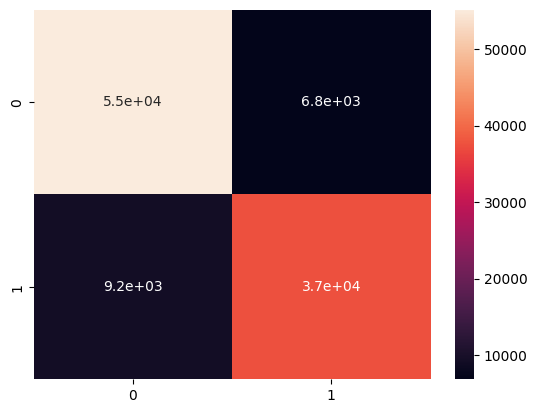

In [242]:
#  визуализируем confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot = True)
plt.show()

In [243]:
# Импортируем classification_report из sklearn.metrics
from sklearn.metrics import classification_report

# Выведем classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_test_predict))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     61980
           1       0.85      0.80      0.82     46652

    accuracy                           0.85    108632
   macro avg       0.85      0.85      0.85    108632
weighted avg       0.85      0.85      0.85    108632



In [244]:
# Оценим метрику при сбалансированном классе:
print("Accuracy score тренировочная выборка:", metrics.accuracy_score(y_train, y_train_predict_weighted))
print("Accuracy score тестовая выборка:", metrics.accuracy_score(y_test, y_test_predict_weighted))

Accuracy score тренировочная выборка: 0.851148490197387
Accuracy score тестовая выборка: 0.8514710214301495


In [245]:
# Выведем classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_test_predict_weighted))



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     61980
           1       0.82      0.84      0.83     46652

    accuracy                           0.85    108632
   macro avg       0.85      0.85      0.85    108632
weighted avg       0.85      0.85      0.85    108632



Метрика accuracy осталась почти не изменилась (совсем немного уменьшилась). Появились некоторые изменения в метриках precision и recall, что можно учитывать, если нужно ориентироваться на данные метрики. В нашей учебной задаче мы ориентируемся на метрику accuracy.

Попробуем дополнительно стандартизовать данные, т.к. такие модели, как логистическая регрессия или используемые нами нейросети чувствительны к нестандартизованным данным.

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train)
X_test_flat = scaler.transform(X_test)

Построим модель логистической регрессии на стандартизированных данных. оценим метрики.

In [247]:
lr_flat = LogisticRegression(
    multi_class='multinomial',
    penalty= 'l2',
    solver= 'newton-cg', random_state = 42)

# Обучаем модель
lr_flat.fit(X_train_flat, y_train)

# делаем предсказания
y_train_predict_flat = lr_flat.predict(X_train_flat)
y_test_predict_flat = lr_flat.predict(X_test_flat)


In [248]:
print("Accuracy score тренировочная выборка:", metrics.accuracy_score(y_train, y_train_predict_flat))
print("Accuracy score тестовая выборка:", metrics.accuracy_score(y_test, y_test_predict_flat))

Accuracy score тренировочная выборка: 0.8524027275635346
Accuracy score тестовая выборка: 0.8526493114367774


Не удалось добиться улучшения метрики с помощью стандартизации данных.

### 2. Random Forest

In [155]:
# Построим модель случайного леса с выбранными моделью параметрами и оценим метрики. для случайного леса можно использовать нестандартизованные данные.

score_rf

# [{'model': 'RandomForest',
#   'best_score': 0.8637368924155558,
#   'best_params': {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 400}}]


[{'model': 'RandomForest',
  'best_score': 0.8637368924155558,
  'best_params': {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 400}}]

In [249]:
rf = RandomForestClassifier(
    n_estimators= 400,
    max_depth= 8,
    min_samples_leaf= 4,
    random_state=42)

In [250]:
rf.fit(X_train,y_train)

y_train_predict= rf.predict(X_train)
y_test_predict= rf.predict(X_test)

In [251]:
print("Accuracy score тренировочная выборка:", metrics.accuracy_score(y_train, y_train_predict))
print("Accuracy score тестовая выборка:", metrics.accuracy_score(y_test, y_test_predict))

# Accuracy score тренировочная выборка: 0.8646091036920606
# Accuracy score тестовая выборка: 0.8632723322777819

Accuracy score тренировочная выборка: 0.8646091036920606
Accuracy score тестовая выборка: 0.8632723322777819


In [252]:
print(confusion_matrix(y_test, y_test_predict))

[[54934  7046]
 [ 7807 38845]]


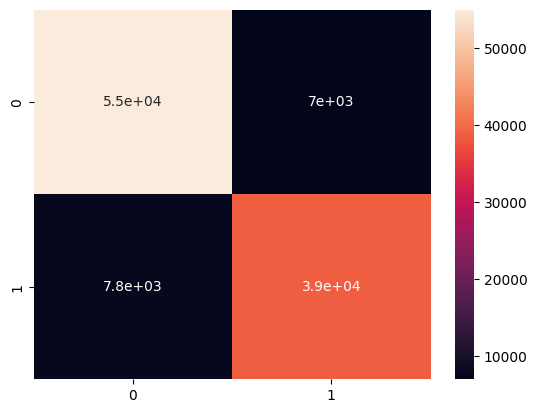

In [253]:
#  визуализируем confusion matrix

sns.heatmap(confusion_matrix(y_test, y_test_predict), annot = True)
plt.show()

In [254]:
# Выведем classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_test_predict))



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     61980
           1       0.85      0.83      0.84     46652

    accuracy                           0.86    108632
   macro avg       0.86      0.86      0.86    108632
weighted avg       0.86      0.86      0.86    108632



По-сравнению с логистической регрессией, метрика улучшилась, но не намного. 

_________________

### 4. Нейронные сети

#### 4.1 Нейронная сеть MLPCLassifier()

In [258]:
score_mlc
# [{'model': 'MLPClassifier',
#   'best_score': 0.8632467042974733,
#   'best_params': {'activation': 'logistic',
#    'hidden_layer_sizes': 6,
#    'solver': 'lbfgs'}}]

[{'model': 'MLPClassifier',
  'best_score': 0.8632536084675899,
  'best_params': {'activation': 'logistic',
   'hidden_layer_sizes': 6,
   'solver': 'lbfgs'}}]

In [259]:
# начнем с готовой сети MLPClassifier, будем использовать стандартизированные данные

clf = MLPClassifier(hidden_layer_sizes = 6, activation = 'logistic', solver= 'lbfgs', random_state = 42)
clf.fit(X_train_flat, y_train)

y_train_predict_clf = clf.predict(X_train_flat)
y_test_predict_clf = clf.predict(X_test_flat)

print("Accuracy score тренировочная выборка:", metrics.accuracy_score(y_train, y_train_predict_clf))
print("Accuracy score тестовая выборка:", metrics.accuracy_score(y_test, y_test_predict_clf))

# Accuracy score тренировочная выборка: 0.8633157433255011
# Accuracy score тестовая выборка: 0.8625082848516091

Accuracy score тренировочная выборка: 0.8633157433255011
Accuracy score тестовая выборка: 0.8625082848516091


In [260]:
# Выведем classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_test_predict_clf))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     61980
           1       0.86      0.81      0.84     46652

    accuracy                           0.86    108632
   macro avg       0.86      0.86      0.86    108632
weighted avg       0.86      0.86      0.86    108632



In [165]:
score_mlc_1

[{'model': 'MLPClassifier',
  'best_score': 0.8524395491776408,
  'best_params': {'activation': 'logistic',
   'hidden_layer_sizes': 6,
   'learning_rate': 'adaptive',
   'max_iter': 14,
   'solver': 'lbfgs'}}]

In [167]:
clf_1 = MLPClassifier(hidden_layer_sizes = 6, activation = 'logistic', solver= 'lbfgs', learning_rate= 'adaptive',
   max_iter= 14, random_state = 42)
clf_1.fit(X_train_flat, y_train)

y_train_predict_clf_1 = clf_1.predict(X_train_flat)
y_test_predict_clf_1 = clf_1.predict(X_test_flat)

print("Accuracy score тренировочная выборка:", metrics.accuracy_score(y_train, y_train_predict_clf_1))
print("Accuracy score тестовая выборка:", metrics.accuracy_score(y_test, y_test_predict_clf_1))

Accuracy score тренировочная выборка: 0.8596013596393319
Accuracy score тестовая выборка: 0.8591943442079681


In [170]:
# Выведем classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_test_predict_clf_1))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     61980
           1       0.85      0.81      0.83     46652

    accuracy                           0.86    108632
   macro avg       0.86      0.85      0.86    108632
weighted avg       0.86      0.86      0.86    108632



In [166]:
score_mlc_2

[{'model': 'MLPClassifier',
  'best_score': 0.8632467049330188,
  'best_params': {'hidden_layer_sizes': 8,
   'learning_rate': 'constant',
   'max_iter': 100}}]

In [168]:
clf_2 = MLPClassifier(hidden_layer_sizes = 8, activation = 'logistic', solver= 'lbfgs', learning_rate= 'constant',
   max_iter= 100, random_state = 42)
clf_2.fit(X_train_flat, y_train)

y_train_predict_clf_2 = clf_2.predict(X_train_flat)
y_test_predict_clf_2 = clf_2.predict(X_test_flat)

print("Accuracy score тренировочная выборка:", metrics.accuracy_score(y_train, y_train_predict_clf_2))
print("Accuracy score тестовая выборка:", metrics.accuracy_score(y_test, y_test_predict_clf_2))

Accuracy score тренировочная выборка: 0.8632950311488123
Accuracy score тестовая выборка: 0.86230576625672


In [169]:
# Выведем classification report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_test_predict_clf_2))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     61980
           1       0.86      0.81      0.83     46652

    accuracy                           0.86    108632
   macro avg       0.86      0.86      0.86    108632
weighted avg       0.86      0.86      0.86    108632



В последней итерации подбора параметров accuracy такой же как и при лог регрессии и случайный лес, но параметры precision  и recall  улучшились.

#### 4.2 Сделаем свою нейросеть с помощью tensorflow.keras
##### 4.2.1 Итерация 1

In [261]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.backend import clear_session

In [262]:
clear_session()

In [263]:
# для начала возьмем полносвязную нейросеть, состоящую из 3х слоев, со "стандартным набором": в качестве функции активации возьмем relu, на выходе softmax, 
# при компиляции будем использовать  loss ( 'categorical_crossentropy'), а в качестве optimizer = 'adam',


model = Sequential()
model.add(Dense( 128, activation = 'relu', input_shape = (7,)))
model.add(Dense( 256, activation = 'relu'))
model.add(Dense( 512, activation = 'relu'))
model.add(Dense( 1, activation = 'softmax'))


In [264]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,145 (649.00 KB)

 Trainable params: 166,145 (649.00 KB)

 Non-trainable params: 0 (0.00 B)

In [265]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [266]:
history = model.fit(
    X_train_flat,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_test_flat, y_test)
)

Epoch 1/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4274 - loss: 0.0000e+00 - val_accuracy: 0.4294 - val_loss: 0.0000e+00
Epoch 2/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.4283 - loss: 0.0000e+00 - val_accuracy: 0.4294 - val_loss: 0.0000e+00
Epoch 3/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.4293 - loss: 0.0000e+00 - val_accuracy: 0.4294 - val_loss: 0.0000e+00
Epoch 4/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.4265 - loss: 0.0000e+00 - val_accuracy: 0.4294 - val_loss: 0.0000e+00
Epoch 5/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.4282 - loss: 0.0000e+00 - val_accuracy: 0.4294 - val_loss: 0.0000e+00
Epoch 6/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.4269 - loss: 0.0000e+00 - val_accuracy: 0.4294 - val_loss: 0.0000e+00
Epoch 7/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.4288 - loss: 0.0000e+00 - val_accuracy: 0.4294 - val_loss: 0.0000e+00
Epoch 8/10
6790/6790 ━━━━━━

In [270]:
model.predict(X_test_flat)

3395/3395 ━━━━━━━━━━━━━━━━━━━━ 3s 899us/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [271]:
np.argmax(model.predict(X_test_flat), axis = 1)

3395/3395 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [272]:
print(metrics.accuracy_score(y_test, np.argmax(model.predict(X_test_flat), axis = 1)))
# 0.5705501141468444

3395/3395 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
0.5705501141468444


Качество оказалось невысоким, даже ниже чем при использовании логистической регрессии и случайного леса.



##### 4.2.2 Итерация 2

Попробуем добавить еще 1 слой в нашу нейросеть, изменить функцию активации для последнего слоя (на 'logistic', т.к. речь идет о бинарной классификации), а также будем использовать loss функцию 'binary_crossentropy', проверим метрики.

In [273]:
clear_session()

In [274]:
model_1 = Sequential()
model_1.add(Dense( 64, activation = 'relu', input_shape = (7,)))
model_1.add(Dense( 512, activation = 'relu'))
model_1.add(Dense( 128, activation = 'relu'))
model_1.add(Dense( 64, activation = 'relu'))
model_1.add(Dense( 1, activation = 'sigmoid'))


In [275]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,777 (421.00 KB)

 Trainable params: 107,777 (421.00 KB)

 Non-trainable params: 0 (0.00 B)

In [276]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [277]:
history_1 = model_1.fit(
    X_train_flat,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_test_flat, y_test))

Epoch 1/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8586 - loss: 0.3322 - val_accuracy: 0.8623 - val_loss: 0.3227
Epoch 2/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8635 - loss: 0.3240 - val_accuracy: 0.8624 - val_loss: 0.3212
Epoch 3/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8641 - loss: 0.3221 - val_accuracy: 0.8629 - val_loss: 0.3225
Epoch 4/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8639 - loss: 0.3220 - val_accuracy: 0.8619 - val_loss: 0.3228
Epoch 5/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8639 - loss: 0.3217 - val_accuracy: 0.8635 - val_loss: 0.3210
Epoch 6/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8637 - loss: 0.3226 - val_accuracy: 0.8635 - val_loss: 0.3203
Epoch 7/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8648 - loss: 0.3205 - val_accuracy: 0.8639 - val_loss: 0.3206
Epoch 8/10
6790/6790 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8635 - loss: 0

In [278]:
predict_1 = model_1.predict(X_test_flat)
predict_1

3395/3395 ━━━━━━━━━━━━━━━━━━━━ 3s 850us/step


array([[0.94149184],
       [0.04649569],
       [0.34473324],
       ...,
       [0.01306733],
       [0.7681318 ],
       [0.17719305]], dtype=float32)

In [279]:
np.round(predict_1)

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [280]:
print(metrics.accuracy_score(y_test, np.round(predict_1)))

0.8629225274320642


In [281]:
prediction = model_1.predict(X_test_flat)
predicted_classed = (prediction>0.5).astype(int).flatten()
accuracy_1 = metrics.accuracy_score(y_test, predicted_classed)
accuracy_1

3395/3395 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step


0.8629225274320642

In [282]:
prediction_train = model_1.predict(X_train_flat)
predicted_classed_train = (prediction_train>0.5).astype(int).flatten()
accuracy_2 = metrics.accuracy_score(y_train, predicted_classed_train)


13579/13579 ━━━━━━━━━━━━━━━━━━━━ 9s 691us/step


In [283]:
print("Accuracy score тренировочная выборка:", accuracy_2)
print("Accuracy score тестовая выборка:", accuracy_1)

# Accuracy score тренировочная выборка: 0.8642685034531801
# Accuracy score тестовая выборка: 0.8633459754031961

Accuracy score тренировочная выборка: 0.8634745366801142
Accuracy score тестовая выборка: 0.8629225274320642


Данная метрика оказалась лучше первой итерации, и результат сопоставим с результатами алгоритма Случайный лес.

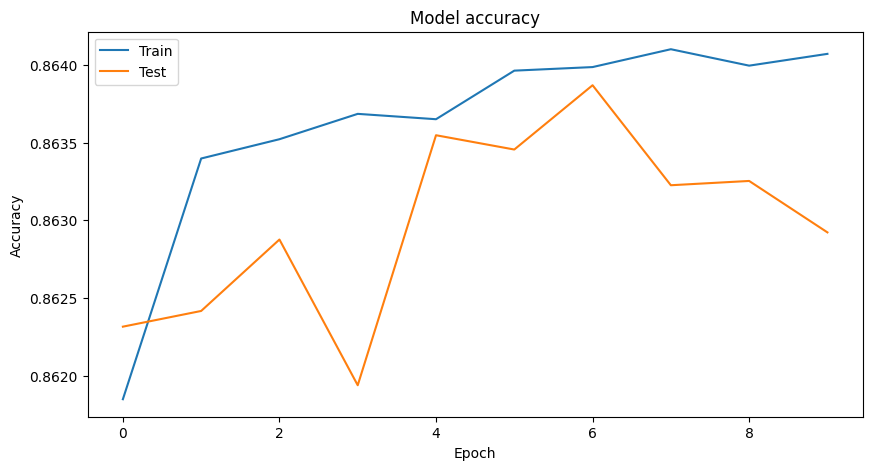

In [284]:
# Визуализируем метрику accuracy ина тренировочной и тестовой выборках
# plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

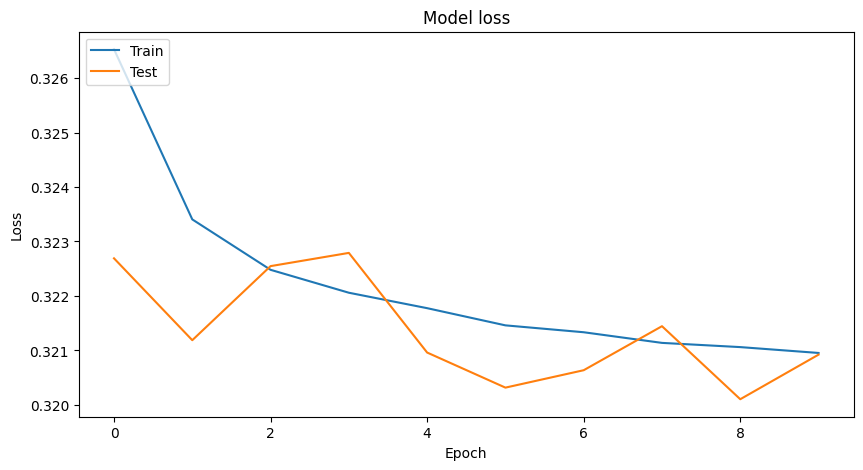

In [285]:
# Визуализируем значения loss функии на каждой из эпох обучения для тренировочной и тестовой выборок
# plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

___
## Выводы:

Для решения данной задачи подходят как модель машинного обучения случайный лес со следующими параметрами:
    [{'model': 'RandomForest',
       'best_score': 0.8637368924155558,
       'best_params': {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 400}}]

Так и модели нейросетей: MLPClassifier() со следующими параметрами:
    {'model': 'MLPClassifier',
    'best_score': 0.8632467049330188,
    'best_params': {'hidden_layer_sizes': 8,
    'learning_rate': 'constant',
    'max_iter': 100}}

А также полносвязная нейросеть:
    model_1 = Sequential()
    model_1.add(Dense( 64, activation = 'relu', input_shape = (7,)))
    model_1.add(Dense( 512, activation = 'relu'))
    model_1.add(Dense( 128, activation = 'relu'))
    model_1.add(Dense( 64, activation = 'relu'))
    model_1.add(Dense( 1, activation = 'sigmoid'))

    model_1.compile(
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy'])
    



Во всех случаях качество метрики    accuracy на обеих выборках было сравнимо и равно 0.86.

